## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">The Capstone Project of Data Analytics Module</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:150%; text-align:center; border-radius:10px 10px;">Car Price Prediction EDA</p>

**``In this context, the project consists of 3 parts in general:``**
* **The first part** is related to 'Data Cleaning'. It deals with Incorrect Headers, Incorrect Format, Anomalies, and Dropping useless columns.
* **The second part** is related to 'Filling Data', in other words 'Imputation'. It deals with Missing Values. Categorical to numeric transformation is done as well.
* **The third part** is related to 'Handling Outliers of Data' via Visualization libraries. So, some insights will be extracted.

# AutoScout - Part 3 - `( Handling Outliers of Data )`

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
df0 = pd.read_csv("filled_Null_AutoScout.csv")

In [3]:
df = df0.copy()

In [4]:
df.duplicated().sum()

65

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.shape

(14143, 24)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14143 entries, 0 to 14207
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           14143 non-null  object 
 1   body_type            14143 non-null  object 
 2   price                14143 non-null  int64  
 3   km                   14143 non-null  float64
 4   kW                   14143 non-null  float64
 5   Type                 14143 non-null  object 
 6   Previous Owners      14143 non-null  float64
 7   Nr. of Doors         14143 non-null  float64
 8   Nr. of Seats         14143 non-null  float64
 9   Gearing Type         14143 non-null  object 
 10  Drive chain          14143 non-null  object 
 11  Fuel                 14143 non-null  object 
 12  CO2 Emission         14143 non-null  float64
 13  comfort_convenience  14143 non-null  object 
 14  entertainment_media  14143 non-null  object 
 15  Extras               14143 non-null 

In [8]:
df.head(3).T

,0,1,2
make_model,Audi A1,Audi A1,Audi A1
body_type,Sedans,Sedans,Sedans
price,15770,14500,14640
km,56013.000,80000.000,83450.000
kW,66.000,141.000,85.000
Type,Used,Used,Used
Previous Owners,2.000,1.000,1.000
Nr. of Doors,5.000,3.000,4.000
Nr. of Seats,5.000,4.000,4.000
Gearing Type,Automatic,Automatic,Automatic


In [9]:
df.sample(3).T

,13506,5085,10189
make_model,Renault Espace,Audi A3,Opel Insignia
body_type,Van,Sedans,Station wagon
price,23990,25400,21890
km,52285.000,10.000,31000.000
kW,118.000,85.000,100.000
Type,Used,Pre-registered,Used
Previous Owners,1.000,0.000,1.000
Nr. of Doors,4.000,5.000,5.000
Nr. of Seats,7.000,5.000,5.000
Gearing Type,Automatic,Manual,Automatic


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,14143.000,18104.050,7427.459,13.000,12950.000,16950.000,21900.000,74600.000
km,14143.000,32584.904,36834.565,0.000,3900.500,21000.000,46914.000,317000.000
kW,14143.000,88.063,27.472,0.000,66.000,85.000,101.000,294.000
Previous Owners,14143.000,1.041,0.338,0.000,1.000,1.000,1.000,4.000
Nr. of Doors,14143.000,4.658,0.643,1.000,4.000,5.000,5.000,7.000
Nr. of Seats,14143.000,4.949,0.466,2.000,5.000,5.000,5.000,7.000
CO2 Emission,14143.000,110.017,34.507,0.000,103.000,115.000,128.000,990.000
Gears,14143.000,5.943,0.800,1.000,5.000,6.000,6.000,50.000
age,14143.000,1.415,1.109,0.000,0.000,1.000,2.000,3.000
Displacement_cc,14143.000,1430.397,336.840,1.000,1229.000,1461.000,1598.000,16000.000


In [11]:
df.describe(include="O").T

,count,unique,top,freq
make_model,14143,9,Audi A3,2737
body_type,14143,8,Sedans,7238
Type,14143,5,Used,10109
Gearing Type,14143,3,Manual,7175
Drive chain,14143,3,front,13972
Fuel,14143,4,Benzine,7513
comfort_convenience,14143,6198,"Air conditioning,Electrical side mirrors,Hill ...",308
entertainment_media,14143,346,"Bluetooth,Hands-free equipment,On-board comput...",1542
Extras,14143,659,Alloy wheels,4988
safety_security,14143,4443,"ABS,Central door lock,Daytime running lights,D...",613


In [12]:
df.columns

Index(['make_model', 'body_type', 'price', 'km', 'kW', 'Type',
       'Previous Owners', 'Nr. of Doors', 'Nr. of Seats', 'Gearing Type',
       'Drive chain', 'Fuel', 'CO2 Emission', 'comfort_convenience',
       'entertainment_media', 'Extras', 'safety_security', 'Gears',
       'Inspection_new', 'age', 'Upholstery_type', 'Displacement_cc',
       'Weight_kg', 'cons_comb'],
      dtype='object')

### Numeric Columns of Dataset

In [13]:
df_numeric = df.select_dtypes(include=['int', "float"])
df_numeric.columns

# df.select_dtypes(include=['number"]).columns
# df.select_dtypes(exclude="O").columns

Index(['price', 'km', 'kW', 'Previous Owners', 'Nr. of Doors', 'Nr. of Seats',
       'CO2 Emission', 'Gears', 'age', 'Displacement_cc', 'Weight_kg',
       'cons_comb'],
      dtype='object')

### Object Columns of Dataset

In [14]:
df_object = df.select_dtypes(include='object')
df_object.columns

Index(['make_model', 'body_type', 'Type', 'Gearing Type', 'Drive chain',
       'Fuel', 'comfort_convenience', 'entertainment_media', 'Extras',
       'safety_security', 'Inspection_new', 'Upholstery_type'],
      dtype='object')

We divided the columns into 2 parts. We will first examine the numeric columns and then the categorical columns.

In [15]:
def fill_with(df, group_col1, group_col2, col_name, method):
    
    if method == "mode":
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                mode1 = list(df[cond1][col_name].mode())
                mode2 = list(df[cond2][col_name].mode())
                if mode2 != []:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond2][col_name].mode()[0])
                elif mode1 != []:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond1][col_name].mode()[0])
                else:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[col_name].mode()[0])
                
    elif method == "mean":
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond2][col_name].mean()).fillna(df[cond1][col_name].mean()).fillna(df[col_name].mean())


    elif method == "median":
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond2][col_name].median()).fillna(df[cond1][col_name].median()).fillna(df[col_name].mean())

    elif method == "ffill":           
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(method="ffill").fillna(method="bfill")
                
        for group1 in list(df[group_col1].unique()):
            cond1 = df[group_col1]==group1
            df.loc[cond1, col_name] = df.loc[cond1, col_name].fillna(method="ffill").fillna(method="bfill")            
           
        df[col_name] = df[col_name].fillna(method="ffill").fillna(method="bfill")
    
    print("Number of NaN : ",df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

# Numeric Columns

## - price

In [16]:
df["price"].describe()

count   14143.000
mean    18104.050
std      7427.459
min        13.000
25%     12950.000
50%     16950.000
75%     21900.000
max     74600.000
Name: price, dtype: float64

In [17]:
df["price"].sort_values().head(10)

7763       13
7992      120
5445      255
7993      331
7991     4950
7989     4990
7990     5250
7988     5300
12380    5445
7987     5450
Name: price, dtype: int64

In [18]:
df.drop(index=df[df["price"] < 4950].index, axis = 0, inplace = True)

In [19]:
df.reset_index(drop = True, inplace = True)

In [20]:
df["price"].sort_values(ascending=False).head(10)

3292     74600
14055    68320
3293     67600
3232     64900
14056    64332
14059    64298
3240     63900
14061    63477
3235     62900
3239     58990
Name: price, dtype: int64

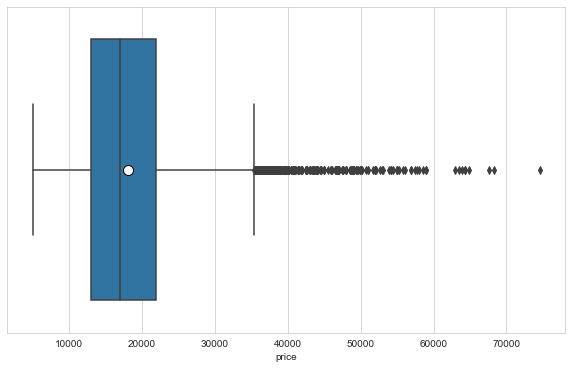

In [21]:
sns.boxplot(data=df,
            x='price',
            showmeans=True,
            meanprops={
                "marker": "o",
                "markerfacecolor": "white",
                "markeredgecolor": "black",
                "markersize": "10"
            });

In [22]:
df.groupby("make_model").price.describe()

,count,mean,std,min,25%,50%,75%,max
make_model,,,,,,,,
Audi A1,2367.000,18718.655,4450.739,8999.000,15552.500,17500.000,21790.000,37900.000
Audi A2,1.000,28200.000,NaN,28200.000,28200.000,28200.000,28200.000,28200.000
Audi A3,2737.000,20959.187,5114.343,5555.000,17900.000,20900.000,23401.000,74600.000
Opel Astra,2294.000,15919.874,5017.408,6000.000,12419.500,15350.000,17990.000,39433.000
Opel Corsa,1979.000,11044.624,2985.691,4950.000,8690.000,10328.000,13490.000,18622.000
Opel Insignia,2396.000,21496.343,7752.573,8290.000,15500.000,19990.000,24392.500,52120.000
Renault Clio,1469.000,12004.871,4298.496,5445.000,9150.000,10500.000,14790.000,31500.000
Renault Duster,18.000,13129.889,1659.899,10850.000,11925.000,13189.000,14399.000,16033.000
Renault Espace,878.000,30284.822,8816.648,12614.000,23912.500,28990.000,35134.500,68320.000


In [23]:
df.groupby(["make_model", "age"]).price.describe()

count      mean      std       min       25%       50%  \
make_model     age                                                              
Audi A1        0.000 677.000 23869.672 3379.393 14900.000 21490.000 22900.000   
               1.000 724.000 18396.814 2575.137 13450.000 16430.000 16949.500   
               2.000 398.000 16669.724 2237.695 10999.000 14999.000 15900.000   
               3.000 568.000 14425.079 1963.592  8999.000 12999.000 13940.000   
Audi A2        1.000   1.000 28200.000      NaN 28200.000 28200.000 28200.000   
Audi A3        0.000 644.000 24974.093 3242.396 15500.000 23500.000 24900.000   
               1.000 730.000 22586.058 5415.414  5555.000 20807.500 21500.000   
               2.000 649.000 19973.102 4073.826 10550.000 18000.000 19290.000   
               3.000 714.000 16570.887 2895.350 10950.000 15000.000 15950.000   
Opel Astra     0.000 625.000 21449.790 5164.999  6950.000 17824.000 18980.000   
               1.000 696.000 16202.960 1856.134  8860.000 14900.000 15550.000   
               2.000 474.000 13019.943 2043.038  7800.000 11700.000 12535.000   
               3.000 499.000 11353.427 2514.917  6000.000  9520.000 10750.000   
Opel Corsa     0.000 565.000 13733.042 2684.314  7650.000 10990.000 14490.000   
               1.000 665.000 11368.947 2070.170  7499.000  9600.000  9980.000   
               2.000 359.000  9255.827 1656.421  6200.000  8300.000  8800.000   
               3.000 390.000  8243.459 1882.374  4950.000  7290.000  7650.000   
Opel Insignia  0.000 599.000 32518.988 5413.592 19900.000 28497.500 32990.000   
               1.000 730.000 21476.234 2058.297 15990.000 19990.000 21400.000   
               2.000 532.000 16967.898 2904.384  8990.000 14980.000 17812.500   
               3.000 535.000 13685.591 2174.551  8290.000 12390.000 13900.000   
Renault Clio   0.000 298.000 12233.406 3424.965  6900.000 10641.000 10990.000   
               1.000 485.000 14453.429 5011.652  7950.000 10000.000 14400.000   
               2.000 347.000 10868.890 3104.285  6000.000  8990.000  9500.000   
               3.000 339.000  9463.664 2767.830  5445.000  7725.000  8450.000   
Renault Duster 0.000  18.000 13129.889 1659.899 10850.000 11925.000 13189.000   
Renault Espace 0.000 231.000 40518.879 7893.569 24200.000 34155.000 39675.000   
               1.000 237.000 31811.418 4102.051 23099.000 28990.000 31900.000   
               2.000 138.000 26736.725 3804.359 14600.000 24490.000 27000.000   
               3.000 272.000 22063.379 3337.436 12614.000 19900.000 21977.500   

                           75%       max  
make_model     age                        
Audi A1        0.000 26900.000 37900.000  
               1.000 20500.000 33900.000  
               2.000 17999.500 23490.000  
               3.000 15842.500 19900.000  
Audi A2        1.000 28200.000 28200.000  
Audi A3        0.000 26188.000 63900.000  
               1.000 22900.000 74600.000  
               2.000 20900.000 67600.000  
               3.000 17880.000 42500.000  
Opel Astra     0.000 25225.000 39433.000  
               1.000 17978.000 18990.000  
               2.000 14500.000 19950.000  
               3.000 13499.000 17750.000  
Opel Corsa     0.000 15990.000 18622.000  
               1.000 13490.000 15790.000  
               2.000  8990.000 13990.000  
               3.000  7950.000 16950.000  
Opel Insignia  0.000 36715.000 52120.000  
               1.000 22990.000 38900.000  
               2.000 18890.000 21990.000  
               3.000 14992.500 18400.000  
Renault Clio   0.000 11468.500 26970.000  
               1.000 16389.000 31500.000  
               2.000 12880.000 27900.000  
               3.000 11000.000 19499.000  
Renault Duster 0.000 14399.000 16033.000  
Renault Espace 0.000 45940.000 68320.000  
               1.000 34990.000 39990.000  
               2.000 28990.000 33900.000  
               3.000 24625.000 32900.000

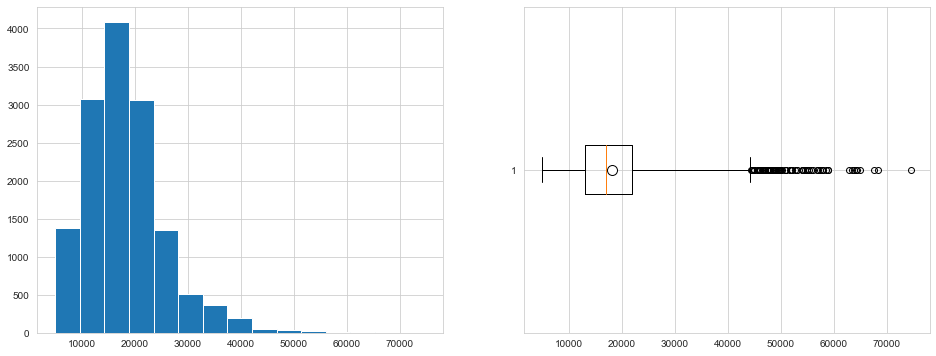

In [24]:
plt.figure(figsize=(16, 6))

plt.subplot(121)
plt.hist(df.price, bins=15)

plt.subplot(122)
plt.boxplot(df.price,
            vert=False,
            whis=2.5,
            showmeans=True,
            meanprops={
                "marker": "o",
                "markerfacecolor": "white",
                "markeredgecolor": "black",
                "markersize": "10"
            })

plt.show()

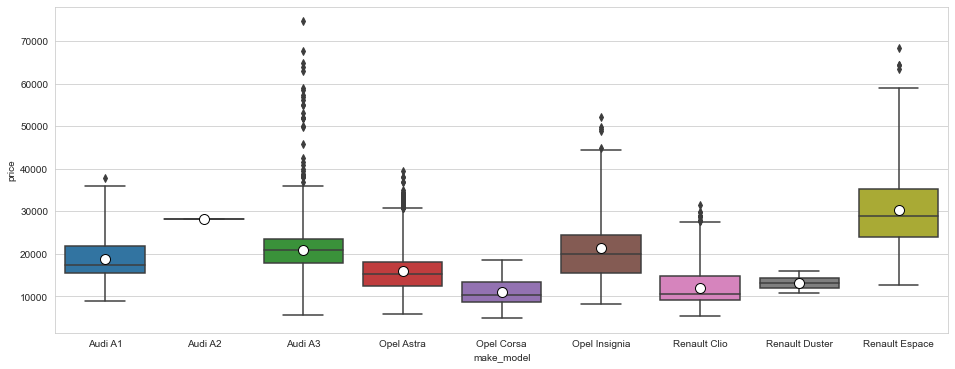

In [25]:
plt.figure(figsize=(16, 6))

sns.boxplot(x="make_model",
            y="price",
            data=df,
            whis=2.3,
            showmeans=True,
            meanprops={
                "marker": "o",
                "markerfacecolor": "white",
                "markeredgecolor": "black",
                "markersize": "10"
            })

plt.show()

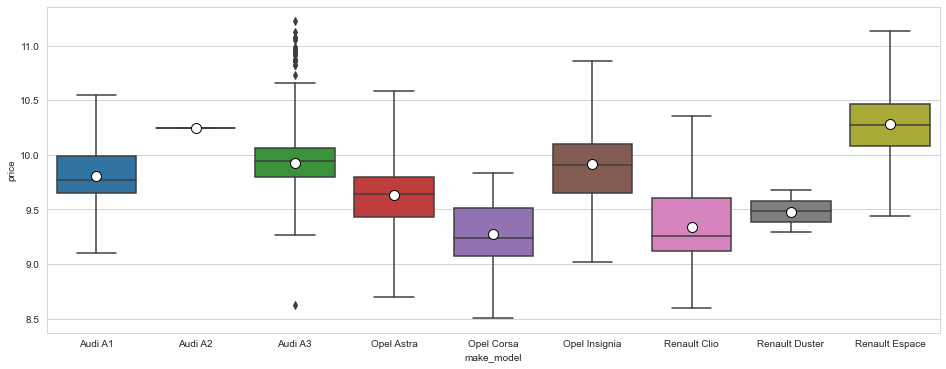

In [26]:
plt.figure(figsize=(16, 6))

sns.boxplot(x="make_model",
            y=np.log(df.price),
            data=df,
            whis=2.3,
            showmeans=True,
            meanprops={
                "marker": "o",
                "markerfacecolor": "white",
                "markeredgecolor": "black",
                "markersize": "10"
            })

plt.show()

We have determined that the price range is very wide especially in the Audi A3 car. Therefore, according to the boxplot we created, a large number of outliers were formed. According to our research and domain knowledge, most of these values are possible extreme values. Therefore, although we deleted the very small values, which was impossible, we did not delete the high values.

## - km

In [27]:
df["km"].describe()

count    14139.000
mean     32593.718
std      36836.024
min          0.000
25%       3917.500
50%      21000.000
75%      46928.000
max     317000.000
Name: km, dtype: float64

In [28]:
df["km"].sort_values().head(10)

12978   0.000
11296   0.000
2162    0.000
13911   0.000
7034    0.000
4579    0.000
4982    0.000
2267    0.000
8923    0.000
671     0.000
Name: km, dtype: float64

In [29]:
df["km"].sort_values().tail(10)

9414    222346.000
5729    229500.000
5429    230928.000
5710    231879.000
9714    232000.000
13552   240000.000
5580    248000.000
5105    260000.000
2703    291800.000
8360    317000.000
Name: km, dtype: float64

In [30]:
df[df["km"] >= 260000]

,make_model,body_type,price,km,kW,Type,Previous Owners,Nr. of Doors,Nr. of Seats,Gearing Type,Drive chain,Fuel,CO2 Emission,comfort_convenience,entertainment_media,Extras,safety_security,Gears,Inspection_new,age,Upholstery_type,Displacement_cc,Weight_kg,cons_comb
2703,Audi A3,Sedans,14980,291800.000,110.000,Used,1.000,4.000,5.000,Manual,4WD,Diesel,125.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,On-bo...","Alloy wheels,Sport package,Sport seats,Sport s...","ABS,Adaptive headlights,Central door lock,Dayt...",6.000,No,3.000,Cloth,1968.000,1360.000,4.700
5105,Opel Astra,Station wagon,6000,260000.000,100.000,Used,1.000,5.000,5.000,Automatic,front,Diesel,119.000,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Roof rack,Touch screen,Trailer hi...","ABS,Central door lock,Central door lock with r...",6.000,No,3.000,Cloth,1598.000,1425.000,4.500
8360,Opel Corsa,Sedans,8350,317000.000,66.000,Used,1.000,3.000,5.000,Manual,front,Benzine,136.000,"Air conditioning,Hill Holder,Power windows",On-board computer,Alloy wheels,"ABS,Central door lock with remote control,Dayt...",5.000,No,2.000,Cloth,1398.000,1199.000,6.000


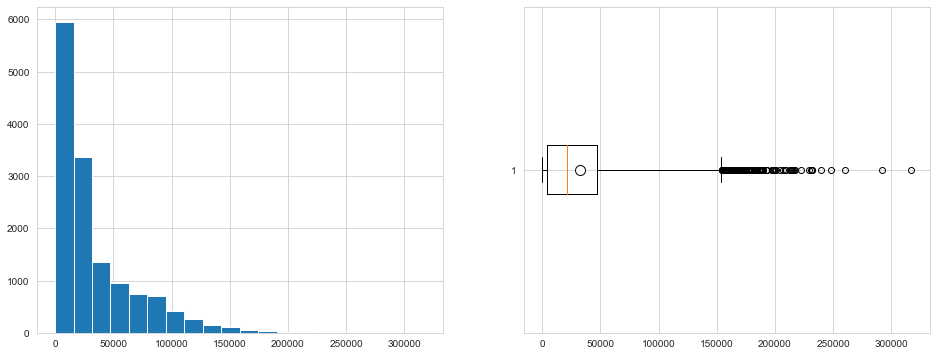

In [31]:
plt.figure(figsize=(16, 6))

plt.subplot(121)
plt.hist(df.km, bins=20)

plt.subplot(122)
plt.boxplot(df.km,
            vert=False,
            whis=2.5,
            showmeans=True,
            meanprops={
                "marker": "o",
                "markerfacecolor": "white",
                "markeredgecolor": "black",
                "markersize": "10"
            })

plt.show()

## - kW

In [32]:
df["kW"].describe()

count   14139.000
mean       88.067
std        27.474
min         0.000
25%        66.000
50%        85.000
75%       101.000
max       294.000
Name: kW, dtype: float64

In [33]:
df["kW"].sort_values().head(15)

12600   0.000
13430   0.000
12096   0.000
13419   0.000
13416   0.000
12232   0.000
12101   0.000
13709   0.000
13401   0.000
13243   0.000
12231   0.000
13244   0.000
13575   0.000
12230   0.000
12229   0.000
Name: kW, dtype: float64

In [34]:
df["kW"].sort_values().tail(15)

3251   294.000
3238   294.000
3293   294.000
3240   294.000
3241   294.000
3292   294.000
3243   294.000
3244   294.000
3245   294.000
3255   294.000
3247   294.000
3248   294.000
3249   294.000
3232   294.000
3246   294.000
Name: kW, dtype: float64

In [35]:
np.sort(df.kW.unique())

array([  0.,   1.,   4.,   9.,  40.,  44.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  60.,  63.,  65.,  66.,  67.,  70.,  71.,  74.,  75.,
        76.,  77.,  78.,  80.,  81.,  82.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  92.,  93.,  96.,  98., 100., 101., 103., 104., 110.,
       112., 115., 117., 118., 119., 120., 121., 122., 123., 125., 127.,
       132., 133., 135., 137., 140., 141., 143., 146., 147., 149., 150.,
       154., 155., 162., 163., 164., 165., 167., 168., 184., 191., 195.,
       228., 239., 270., 294.])

In [36]:
df[df["kW"] == 0].kW.count()

81

In [37]:
df[df["kW"] == 1].kW.count()

20

In [38]:
df[df["kW"] == 4].kW.count()

1

In [39]:
df[df["kW"] == 9].kW.count()

1

In [40]:
df.kW.loc[df.kW < 32] = np.nan

# Opel Corsa has a 32 kW model

In [41]:
df["kW"].isnull().sum()

103

In [42]:
df.sample(30).groupby(["make_model", "Displacement_cc", "kW"]).kW.describe()

count    mean   std     min     25%  \
make_model     Displacement_cc kW                                             
Audi A1        999.000         70.000   2.000  70.000 0.000  70.000  70.000   
                               85.000   1.000  85.000   NaN  85.000  85.000   
               1422.000        66.000   1.000  66.000   NaN  66.000  66.000   
                               67.000   1.000  67.000   NaN  67.000  67.000   
               1598.000        85.000   1.000  85.000   NaN  85.000  85.000   
Audi A3        999.000         85.000   3.000  85.000 0.000  85.000  85.000   
               1395.000        110.000  1.000 110.000   NaN 110.000 110.000   
               1598.000        81.000   1.000  81.000   NaN  81.000  81.000   
                               85.000   1.000  85.000   NaN  85.000  85.000   
Opel Astra     999.000         77.000   1.000  77.000   NaN  77.000  77.000   
               1399.000        110.000  2.000 110.000 0.000 110.000 110.000   
               1598.000        81.000   2.000  81.000 0.000  81.000  81.000   
                               100.000  3.000 100.000 0.000 100.000 100.000   
               1600.000        70.000   2.000  70.000 0.000  70.000  70.000   
Opel Corsa     1398.000        66.000   4.000  66.000 0.000  66.000  66.000   
Opel Insignia  1598.000        100.000  1.000 100.000   NaN 100.000 100.000   
               1956.000        118.000  1.000 118.000   NaN 118.000 118.000   
                               125.000  1.000 125.000   NaN 125.000 125.000   
Renault Espace 1997.000        118.000  1.000 118.000   NaN 118.000 118.000   

                                           50%     75%     max  
make_model     Displacement_cc kW                               
Audi A1        999.000         70.000   70.000  70.000  70.000  
                               85.000   85.000  85.000  85.000  
               1422.000        66.000   66.000  66.000  66.000  
                               67.000   67.000  67.000  67.000  
               1598.000        85.000   85.000  85.000  85.000  
Audi A3        999.000         85.000   85.000  85.000  85.000  
               1395.000        110.000 110.000 110.000 110.000  
               1598.000        81.000   81.000  81.000  81.000  
                               85.000   85.000  85.000  85.000  
Opel Astra     999.000         77.000   77.000  77.000  77.000  
               1399.000        110.000 110.000 110.000 110.000  
               1598.000        81.000   81.000  81.000  81.000  
                               100.000 100.000 100.000 100.000  
               1600.000        70.000   70.000  70.000  70.000  
Opel Corsa     1398.000        66.000   66.000  66.000  66.000  
Opel Insignia  1598.000        100.000 100.000 100.000 100.000  
               1956.000        118.000 118.000 118.000 118.000  
                               125.000 125.000 125.000 125.000  
Renault Espace 1997.000        118.000 118.000 118.000 118.000

In [43]:
df.kW.loc[df.kW < 51]

7563    44.000
7995    40.000
12324   40.000
Name: kW, dtype: float64

In [44]:
df[df.kW < 51]

,make_model,body_type,price,km,kW,Type,Previous Owners,Nr. of Doors,Nr. of Seats,Gearing Type,Drive chain,Fuel,CO2 Emission,comfort_convenience,entertainment_media,Extras,safety_security,Gears,Inspection_new,age,Upholstery_type,Displacement_cc,Weight_kg,cons_comb
7563,Opel Corsa,Compact,12435,21050.000,44.000,Used,1.000,5.000,5.000,Automatic,front,Benzine,126.000,"Air conditioning,Cruise control,Electrically h...","Bluetooth,CD player,Hands-free equipment,On-bo...","Alloy wheels,Sport seats","ABS,Central door lock,Daytime running lights,D...",5.000,Yes,1.000,Cloth,1364.000,1163.000,5.700
7995,Opel Corsa,Compact,7650,142.000,40.000,New,1.000,3.000,5.000,Manual,front,Benzine,126.000,Air conditioning,"Bluetooth,Hands-free equipment,MP3,On-board co...",Alloy wheels,"ABS,Central door lock,Driver-side airbag,Immob...",5.000,No,0.000,Cloth,973.000,840.000,5.200
12324,Renault Clio,Compact,5890,134500.000,40.000,Used,1.000,5.000,5.000,Manual,front,Diesel,85.000,"Air conditioning,Power windows","Bluetooth,Hands-free equipment,On-board comput...",Alloy wheels,"ABS,Central door lock,Driver-side airbag,Immob...",5.000,No,3.000,Cloth,1461.000,1165.000,3.300


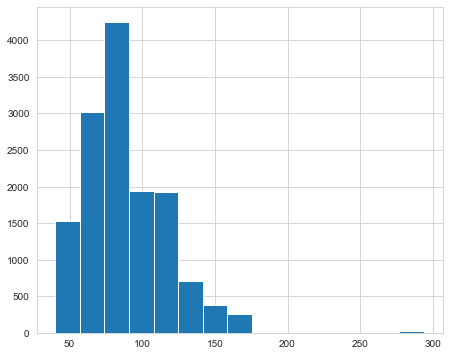

In [45]:
plt.figure(figsize=(16,6))

plt.subplot(121)
plt.hist(df.kW, bins=15)

plt.show()

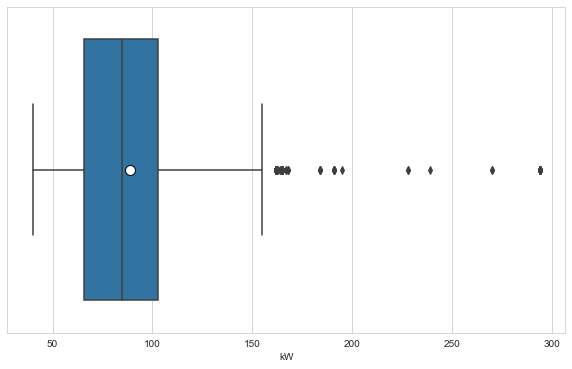

In [46]:
sns.boxplot(data=df,
            x='kW',
            showmeans=True,
            meanprops={
                "marker": "o",
                "markerfacecolor": "white",
                "markeredgecolor": "black",
                "markersize": "10"
            });

In [47]:
for group1 in list(df["make_model"].unique()):
    for group2 in list(df["body_type"].unique()):
        for group3 in list(df["Displacement_cc"].unique()):
            cond1 = df["make_model"] == group1
            cond2 = (df["make_model"] == group1) & (df["body_type"] == group2)
            cond3 = (df["make_model"] == group1) & (
                df["body_type"] == group2) & (df["Displacement_cc"] == group3)
            mode1 = list(df[cond1]["kW"].mode())
            mode2 = list(df[cond2]["kW"].mode())
            mode3 = list(df[cond3]["kW"].mode())
            if mode3 != []:
                df.loc[cond3, "kW"] = df.loc[cond3, "kW"].fillna(
                    df[cond3]["kW"].mode()[0])
            elif mode2 != []:
                df.loc[cond3, "kW"] = df.loc[cond3, "kW"].fillna(
                    df[cond2]["kW"].mode()[0])
            elif mode1 != []:
                df.loc[cond3, "kW"] = df.loc[cond3, "kW"].fillna(
                    df[cond1]["kW"].mode()[0])
            else:
                df.loc[cond3,
                       "kW"] = df.loc[cond3,
                                         "kW"].fillna(df["kW"].mode()[0])

In [48]:
df["kW"].isnull().sum()

0

## - Previous Owners

In [49]:
df["Previous Owners"].describe()

count   14139.000
mean        1.041
std         0.338
min         0.000
25%         1.000
50%         1.000
75%         1.000
max         4.000
Name: Previous Owners, dtype: float64

In [50]:
df["Previous Owners"].value_counts(dropna=False)

1.000    12605
2.000     1007
0.000      495
3.000       30
4.000        2
Name: Previous Owners, dtype: int64

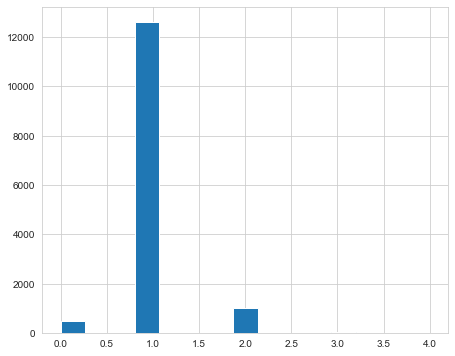

In [51]:
plt.figure(figsize=(16, 6))

plt.subplot(121)
plt.hist(df['Previous Owners'], bins=15)

plt.show()

## - Nr. of Doors

In [52]:
df["Nr. of Doors"].describe()

count   14139.000
mean        4.659
std         0.643
min         1.000
25%         4.000
50%         5.000
75%         5.000
max         7.000
Name: Nr. of Doors, dtype: float64

In [53]:
df["Nr. of Doors"].value_counts(dropna=False)

5.000    10442
4.000     2758
3.000      743
2.000      194
1.000        1
7.000        1
Name: Nr. of Doors, dtype: int64

In [54]:
df["Nr. of Doors"].replace([1, 7], np.nan, inplace=True)

In [55]:
df["Nr. of Doors"].value_counts(dropna = False)

5.000    10442
4.000     2758
3.000      743
2.000      194
NaN          2
Name: Nr. of Doors, dtype: int64

In [56]:
fill_with(df, "make_model", "body_type", "Nr. of Doors", "mode")

Number of NaN :  0
------------------
5.000    10444
4.000     2758
3.000      743
2.000      194
Name: Nr. of Doors, dtype: int64


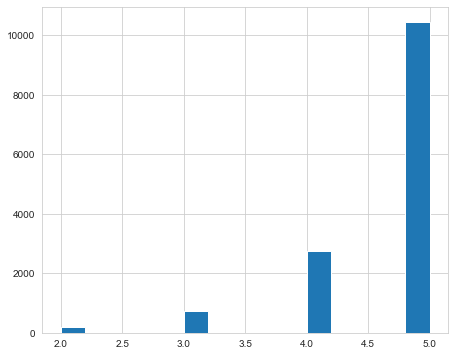

In [57]:
plt.figure(figsize=(16, 6))

plt.subplot(121)
plt.hist(df['Nr. of Doors'], bins=15)

plt.show()

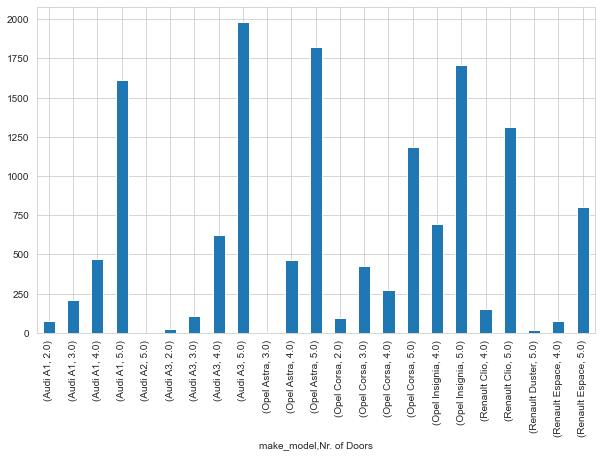

In [58]:
df.groupby(["make_model", "Nr. of Doors"])["Nr. of Doors"].count().plot.bar();

## - Nr. of Seats

In [59]:
df["Nr. of Seats"].describe()

count   14139.000
mean        4.949
std         0.466
min         2.000
25%         5.000
50%         5.000
75%         5.000
max         7.000
Name: Nr. of Seats, dtype: float64

In [60]:
df["Nr. of Seats"].value_counts(dropna=False)

5.000    12668
4.000     1070
7.000      309
2.000       89
6.000        2
3.000        1
Name: Nr. of Seats, dtype: int64

In [61]:
df[df["Nr. of Seats"] == 3]

,make_model,body_type,price,km,kW,Type,Previous Owners,Nr. of Doors,Nr. of Seats,Gearing Type,Drive chain,Fuel,CO2 Emission,comfort_convenience,entertainment_media,Extras,safety_security,Gears,Inspection_new,age,Upholstery_type,Displacement_cc,Weight_kg,cons_comb
1521,Audi A1,Compact,23090,9821.000,141.000,Used,1.000,2.000,3.000,Automatic,front,Benzine,134.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Catalytic Converter,Sport package...","ABS,Central door lock,Daytime running lights,D...",7.000,Yes,1.000,Part leather,1798.000,1180.000,5.800


In [62]:
df[df["Nr. of Seats"] == 6]

,make_model,body_type,price,km,kW,Type,Previous Owners,Nr. of Doors,Nr. of Seats,Gearing Type,Drive chain,Fuel,CO2 Emission,comfort_convenience,entertainment_media,Extras,safety_security,Gears,Inspection_new,age,Upholstery_type,Displacement_cc,Weight_kg,cons_comb
519,Audi A1,Compact,13500,100000.000,70.000,Used,1.000,5.000,6.000,Manual,front,Benzine,104.000,Air conditioning,On-board computer,Alloy wheels,ABS,5.000,No,2.000,Cloth,1000.000,1500.000,4.900
14115,Renault Espace,Station wagon,42490,2409.874,147.000,New,1.000,5.000,6.000,Automatic,front,Diesel,168.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Touch screen","ABS,Blind spot monitor,Central door lock,Dayti...",6.000,No,0.000,Cloth,1997.000,1840.000,5.700


In [63]:
df["Nr. of Seats"].loc[(df["make_model"] == "Audi A1") & ((df["Nr. of Seats"] == 3) | (df["Nr. of Seats"] == 6))] = np.nan

In [64]:
df[df["Nr. of Seats"] == 3]

,make_model,body_type,price,km,kW,Type,Previous Owners,Nr. of Doors,Nr. of Seats,Gearing Type,Drive chain,Fuel,CO2 Emission,comfort_convenience,entertainment_media,Extras,safety_security,Gears,Inspection_new,age,Upholstery_type,Displacement_cc,Weight_kg,cons_comb


In [65]:
df[df["Nr. of Seats"] == 6]

,make_model,body_type,price,km,kW,Type,Previous Owners,Nr. of Doors,Nr. of Seats,Gearing Type,Drive chain,Fuel,CO2 Emission,comfort_convenience,entertainment_media,Extras,safety_security,Gears,Inspection_new,age,Upholstery_type,Displacement_cc,Weight_kg,cons_comb
14115,Renault Espace,Station wagon,42490,2409.874,147.000,New,1.000,5.000,6.000,Automatic,front,Diesel,168.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Touch screen","ABS,Blind spot monitor,Central door lock,Dayti...",6.000,No,0.000,Cloth,1997.000,1840.000,5.700


In [66]:
df["Nr. of Seats"].isnull().sum()

2

In [67]:
fill_with(df, "make_model", "body_type", "Nr. of Seats", "mode")

Number of NaN :  0
------------------
5.000    12670
4.000     1070
7.000      309
2.000       89
6.000        1
Name: Nr. of Seats, dtype: int64


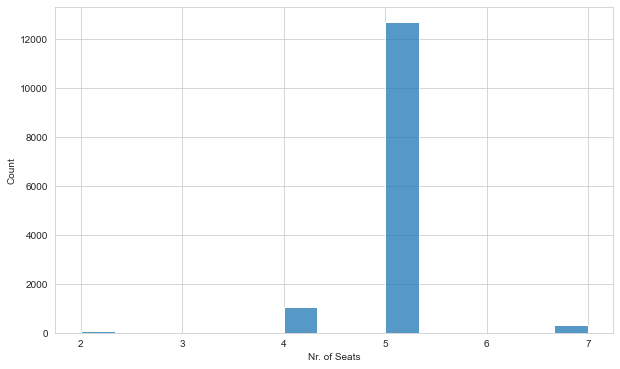

In [68]:
sns.histplot(data=df, x='Nr. of Seats');

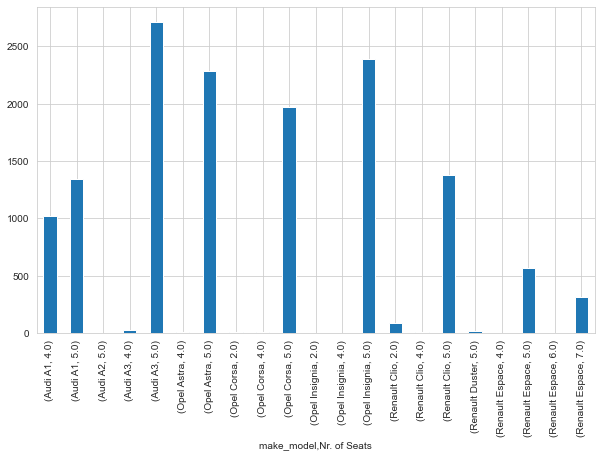

In [69]:
df.groupby(["make_model", "Nr. of Seats"])["Nr. of Seats"].count().plot.bar();

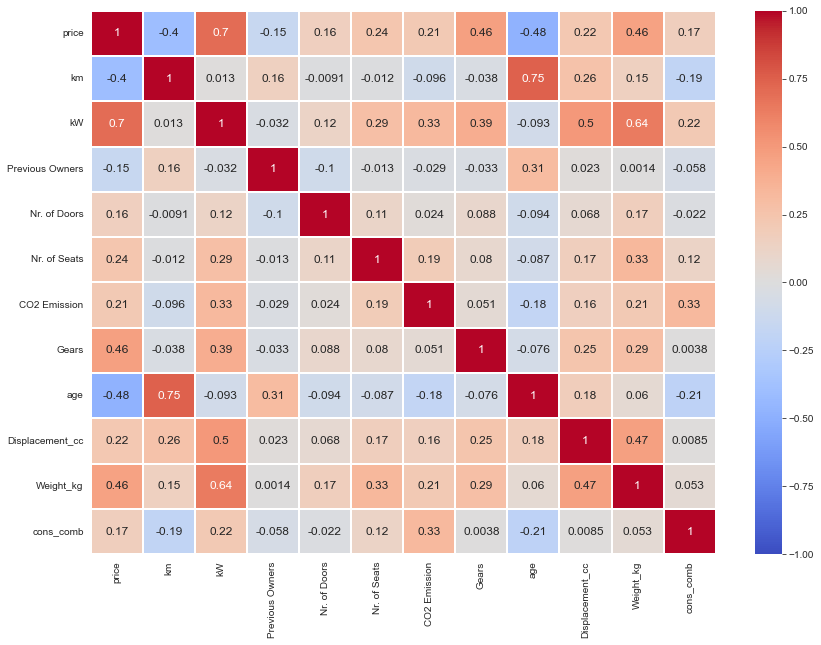

In [70]:
plt.figure(figsize=(14, 10))

sns.heatmap(df.corr(),
            annot=True,
            center=0,
            vmin=-1,
            cmap="coolwarm",
            linewidths=0.2,
            annot_kws={"size": 12});

## - CO2 Emission

In [71]:
df["CO2 Emission"].describe()

count   14139.000
mean      110.015
std        34.511
min         0.000
25%       103.000
50%       115.000
75%       128.000
max       990.000
Name: CO2 Emission, dtype: float64

In [72]:
# Lowest CO2 Emission of cars is 79 g/km

In [73]:
df["CO2 Emission"].value_counts(dropna=False)

120.000    956
97.000     750
104.000    669
135.000    531
99.000     476
          ... 
165.000      1
12.324       1
160.000      1
80.000       1
193.000      1
Name: CO2 Emission, Length: 121, dtype: int64

In [74]:
np.sort(df["CO2 Emission"].unique())

array([  0.        ,   1.        ,   1.06      ,   5.        ,
         8.        ,   9.        ,  10.        ,  11.        ,
        12.087     ,  12.324     ,  13.        ,  13.983     ,
        14.        ,  14.457     ,  15.        ,  16.        ,
        17.        ,  36.        ,  45.        ,  51.        ,
        80.        ,  84.        ,  85.        ,  87.        ,
        88.        ,  89.        ,  90.        ,  91.        ,
        93.        ,  94.        ,  95.        ,  96.        ,
        97.        ,  98.        ,  99.        , 100.        ,
       101.        , 103.        , 104.        , 105.        ,
       106.        , 107.        , 108.        , 108.81529165,
       109.        , 110.        , 111.        , 113.        ,
       114.        , 115.        , 116.        , 117.        ,
       118.        , 119.        , 120.        , 121.        ,
       123.        , 124.        , 125.        , 126.        ,
       127.        , 128.        , 129.        , 130.  

In [75]:
df[(df["CO2 Emission"] < 79) | (df["CO2 Emission"] > 300)]

,make_model,body_type,price,km,kW,Type,Previous Owners,Nr. of Doors,Nr. of Seats,Gearing Type,Drive chain,Fuel,CO2 Emission,comfort_convenience,entertainment_media,Extras,safety_security,Gears,Inspection_new,age,Upholstery_type,Displacement_cc,Weight_kg,cons_comb
5,Audi A1,Sedans,15090,63668.000,85.000,Used,1.000,4.000,5.000,Automatic,front,Diesel,9.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport package,Sport seats,Sport s...","ABS,Central door lock,Daytime running lights,D...",7.000,No,3.000,Part leather,1598.000,1135.000,3.500
11,Audi A1,Sedans,17990,26415.000,92.000,Used,1.000,4.000,5.000,Automatic,front,Benzine,11.000,"Air conditioning,Automatic climate control,Ele...","CD player,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats","ABS,Central door lock,Daytime running lights,D...",7.000,Yes,3.000,Cloth,1395.000,1135.000,4.900
12,Audi A1,Sedans,18380,31600.000,92.000,Used,1.000,5.000,5.000,Automatic,front,Benzine,11.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Catalytic Converter,Sport package...","ABS,Central door lock,Daytime running lights,D...",7.000,No,3.000,Part leather,1395.000,1135.000,4.900
16,Audi A1,Sedans,18900,9752.000,85.000,Used,1.000,5.000,4.000,Automatic,front,Diesel,9.000,"Air conditioning,Leather steering wheel,Power ...","CD player,MP3,Radio","Alloy wheels,Sport package,Sport seats","Central door lock,Driver-side airbag,Electroni...",5.000,No,1.000,Cloth,1598.000,1175.000,3.500
21,Audi A1,Sedans,18500,15850.000,92.000,Used,1.000,5.000,5.000,Automatic,front,Benzine,11.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Central door lock,Central door lock with r...",7.000,Yes,3.000,Cloth,1395.000,1180.000,4.900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14078,Renault Espace,Van,45890,500.000,147.000,Demonstration,1.000,5.000,7.000,Automatic,front,Diesel,14.000,"Air conditioning,Automatic climate control,Ele...","Bluetooth,Hands-free equipment,On-board comput...",Alloy wheels,"Adaptive Cruise Control,Adaptive headlights,Bl...",6.000,No,0.000,Full leather,1997.000,1765.000,5.400
14089,Renault Espace,Van,43490,4252.000,165.000,Demonstration,0.000,5.000,7.000,Automatic,front,Benzine,15.000,"Air conditioning,Armrest,Automatic climate con...",Hands-free equipment,"Alloy wheels,Voice Control","ABS,Adaptive Cruise Control,Alarm system,Blind...",6.000,No,0.000,Part leather,1798.000,1624.000,6.800
14095,Renault Espace,Van,49490,3353.000,165.000,Demonstration,1.000,5.000,5.000,Automatic,front,Benzine,15.000,"Air conditioning,Armrest,Automatic climate con...","Hands-free equipment,Radio","Alloy wheels,Voice Control","ABS,Alarm system,Blind spot monitor,Daytime ru...",6.000,No,0.000,Full leather,1798.000,1585.000,6.800
14101,Renault Espace,Van,48900,12.000,165.000,Used,1.000,5.000,5.000,Automatic,front,Benzine,15.000,"Air conditioning,Armrest,Automatic climate con...","On-board computer,Radio",Alloy wheels,"Central door lock,Driver-side airbag,Passenger...",7.000,No,0.000,Part leather,1798.000,1585.000,6.800


In [76]:
df.loc[(df["CO2 Emission"] < 79) | (df["CO2 Emission"] > 300) , "CO2 Emission"] = np.nan

In [77]:
df["CO2 Emission"].value_counts(dropna=False)

NaN        1098
120.000     956
97.000      750
104.000     669
135.000     531
           ... 
180.000       1
171.000       1
183.000       1
191.000       1
193.000       1
Name: CO2 Emission, Length: 100, dtype: int64

In [78]:
for group1 in list(df["make_model"].unique()):
    for group2 in list(df["body_type"].unique()):
        for group3 in list(df["Fuel"].unique()):
            cond1 = df["make_model"] == group1
            cond2 = (df["make_model"] == group1) & (df["body_type"] == group2)
            cond3 = (df["make_model"] == group1) & (
                df["body_type"] == group2) & (df["Fuel"] == group3)
            mode1 = list(df[cond1]["CO2 Emission"].mode())
            mode2 = list(df[cond2]["CO2 Emission"].mode())
            mode3 = list(df[cond3]["CO2 Emission"].mode())
            if mode3 != []:
                df.loc[cond3,
                       "CO2 Emission"] = df.loc[cond3, "CO2 Emission"].fillna(
                           df[cond3]["CO2 Emission"].mode()[0])
            elif mode2 != []:
                df.loc[cond3,
                       "CO2 Emission"] = df.loc[cond3, "CO2 Emission"].fillna(
                           df[cond2]["CO2 Emission"].mode()[0])
            elif mode1 != []:
                df.loc[cond3,
                       "CO2 Emission"] = df.loc[cond3, "CO2 Emission"].fillna(
                           df[cond1]["CO2 Emission"].mode()[0])
            else:
                df.loc[cond3,
                       "CO2 Emission"] = df.loc[cond3, "CO2 Emission"].fillna(
                           df["CO2 Emission"].mode()[0])

In [79]:
df["CO2 Emission"].value_counts(dropna=False)

104.000    962
120.000    961
97.000     898
135.000    600
126.000    533
          ... 
180.000      1
171.000      1
183.000      1
191.000      1
193.000      1
Name: CO2 Emission, Length: 99, dtype: int64

In [80]:
np.sort(df["CO2 Emission"].unique())

array([ 80.        ,  84.        ,  85.        ,  87.        ,
        88.        ,  89.        ,  90.        ,  91.        ,
        93.        ,  94.        ,  95.        ,  96.        ,
        97.        ,  98.        ,  99.        , 100.        ,
       101.        , 103.        , 104.        , 105.        ,
       106.        , 107.        , 108.        , 108.81529165,
       109.        , 110.        , 111.        , 113.        ,
       114.        , 115.        , 116.        , 117.        ,
       118.        , 119.        , 120.        , 121.        ,
       123.        , 124.        , 125.        , 126.        ,
       127.        , 128.        , 129.        , 130.        ,
       131.        , 133.        , 134.        , 135.        ,
       136.        , 137.        , 138.        , 139.        ,
       140.        , 141.        , 143.        , 144.        ,
       145.        , 146.        , 147.        , 148.        ,
       149.        , 150.        , 151.        , 153.  

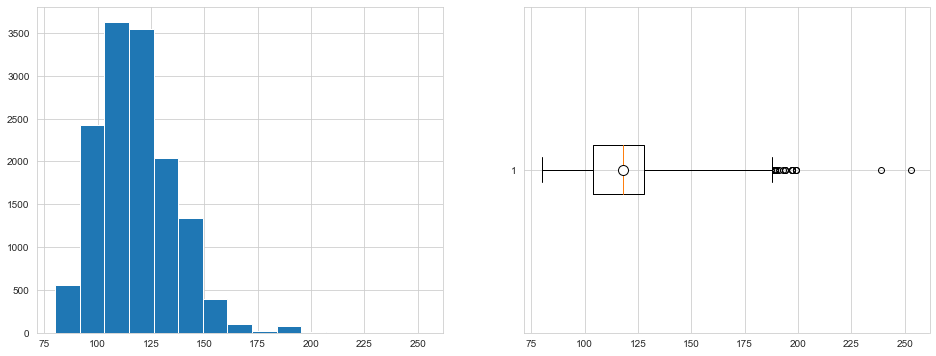

In [81]:
plt.figure(figsize=(16, 6))

plt.subplot(121)
plt.hist(df['CO2 Emission'], bins=15)

plt.subplot(122)
plt.boxplot(df['CO2 Emission'],
            vert=False,
            whis=2.5,
            showmeans=True,
            meanprops={
                "marker": "o",
                "markerfacecolor": "white",
                "markeredgecolor": "black",
                "markersize": "10"
            })

plt.show()

## - Gears

In [82]:
df["Gears"].describe()

count   14139.000
mean        5.943
std         0.800
min         1.000
25%         5.000
50%         6.000
75%         6.000
max        50.000
Name: Gears, dtype: float64

In [83]:
df["Gears"].value_counts(dropna=False)

6.000     7685
5.000     3743
7.000     2502
8.000      198
9.000        4
1.000        2
3.000        2
2.000        1
50.000       1
4.000        1
Name: Gears, dtype: int64

In [84]:
df[df["Gears"].isin([1, 2, 3, 4, 9, 50])]

,make_model,body_type,price,km,kW,Type,Previous Owners,Nr. of Doors,Nr. of Seats,Gearing Type,Drive chain,Fuel,CO2 Emission,comfort_convenience,entertainment_media,Extras,safety_security,Gears,Inspection_new,age,Upholstery_type,Displacement_cc,Weight_kg,cons_comb
8057,Opel Corsa,Compact,11000,24000.000,66.000,Used,1.000,5.000,5.000,Semi-automatic,front,Benzine,126.000,"Air conditioning,Light sensor,Multi-function s...","Bluetooth,On-board computer,Radio,USB","Alloy wheels,Touch screen","ABS,Central door lock,Central door lock with r...",1.000,No,1.000,Cloth,1398.000,1163.000,4.800
8857,Opel Corsa,Sedans,9880,19247.000,51.000,Used,1.000,5.000,5.000,Manual,front,Benzine,126.000,"Air conditioning,Light sensor,Navigation syste...","Bluetooth,On-board computer",Alloy wheels,"ABS,Central door lock,Driver-side airbag,Fog l...",2.000,No,1.000,Cloth,1229.000,1163.000,5.400
12871,Renault Clio,Compact,23990,10.000,147.000,Demonstration,1.000,4.000,5.000,Automatic,front,Benzine,120.000,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Hands-free equipment,On-board computer","Alloy wheels,Sport package,Sport seats,Sport s...","ABS,Central door lock,Daytime running lights,D...",1.000,No,1.000,Cloth,1618.000,1288.000,5.900
12957,Renault Clio,Sedans,10798,10.000,56.000,Pre-registered,1.000,5.000,5.000,Manual,front,Benzine,118.000,"Air conditioning,Cruise control,Electrical sid...",USB,Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",50.000,No,0.000,Cloth,898.000,1165.000,5.200
14043,Renault Espace,Van,54982,11.000,165.000,New,1.000,5.000,5.000,Automatic,front,Benzine,153.000,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Radio","Alloy wheels,Voice Control","ABS,Daytime running lights,Driver-side airbag,...",9.000,No,0.000,Part leather,1798.000,1647.000,7.600
14047,Renault Espace,Van,54204,11.000,146.000,New,1.000,5.000,5.000,Automatic,front,Diesel,120.000,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Radio","Alloy wheels,Voice Control","ABS,Daytime running lights,Driver-side airbag,...",3.000,No,0.000,Part leather,1997.000,1779.000,5.400
14052,Renault Espace,Van,50950,11.000,165.000,New,1.000,5.000,5.000,Automatic,front,Benzine,153.000,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Radio","Alloy wheels,Voice Control","ABS,Daytime running lights,Driver-side airbag,...",4.000,No,0.000,Cloth,1798.000,1647.000,7.600
14053,Renault Espace,Van,52711,11.000,165.000,New,1.000,5.000,5.000,Automatic,front,Benzine,153.000,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Radio","Alloy wheels,Voice Control","ABS,Daytime running lights,Driver-side airbag,...",9.000,No,0.000,Part leather,1798.000,1608.000,7.400
14073,Renault Espace,Van,46660,11.000,118.000,New,1.000,5.000,5.000,Automatic,front,Diesel,120.000,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Radio","Alloy wheels,Voice Control","ABS,Daytime running lights,Driver-side airbag,...",3.000,No,0.000,Part leather,1997.000,1733.000,5.100
14097,Renault Espace,Van,49100,11.000,146.000,New,1.000,5.000,5.000,Automatic,front,Diesel,120.000,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Radio","Alloy wheels,Voice Control","ABS,Daytime running lights,Driver-side airbag,...",9.000,No,0.000,Part leather,1997.000,1740.000,5.300


In [85]:
df.loc[(df["Gears"].isin([1, 2, 3, 4, 9, 50])) , "Gears"] = np.nan

In [86]:
df["Gears"].value_counts(dropna=False)

6.000    7685
5.000    3743
7.000    2502
8.000     198
NaN        11
Name: Gears, dtype: int64

In [87]:
for group1 in list(df["make_model"].unique()):
    for group2 in list(df["body_type"].unique()):
        for group3 in list(df["Gearing Type"].unique()):
            cond1 = df["make_model"] == group1
            cond2 = (df["make_model"] == group1) & (df["body_type"] == group2)
            cond3 = (df["make_model"] == group1) & (
                df["body_type"] == group2) & (df["Gearing Type"] == group3)
            mode1 = list(df[cond1]["Gears"].mode())
            mode2 = list(df[cond2]["Gears"].mode())
            mode3 = list(df[cond3]["Gears"].mode())
            if mode3 != []:
                df.loc[cond3, "Gears"] = df.loc[cond3, "Gears"].fillna(
                    df[cond3]["Gears"].mode()[0])
            elif mode2 != []:
                df.loc[cond3, "Gears"] = df.loc[cond3, "Gears"].fillna(
                    df[cond2]["Gears"].mode()[0])
            elif mode1 != []:
                df.loc[cond3, "Gears"] = df.loc[cond3, "Gears"].fillna(
                    df[cond1]["Gears"].mode()[0])
            else:
                df.loc[cond3,
                       "Gears"] = df.loc[cond3,
                                         "Gears"].fillna(df["Gears"].mode()[0])

In [88]:
df["Gears"].value_counts(dropna=False)

6.000    7693
5.000    3746
7.000    2502
8.000     198
Name: Gears, dtype: int64

## - age

In [89]:
df["age"].describe()

count   14139.000
mean        1.415
std         1.109
min         0.000
25%         0.000
50%         1.000
75%         2.000
max         3.000
Name: age, dtype: float64

In [90]:
df["age"].value_counts(dropna=False)

1.000    4268
0.000    3657
3.000    3317
2.000    2897
Name: age, dtype: int64

## - Displacement_cc

In [91]:
df["Displacement_cc"].describe()

count   14139.000
mean     1430.448
std       336.845
min         1.000
25%      1229.000
50%      1461.000
75%      1598.000
max     16000.000
Name: Displacement_cc, dtype: float64

In [92]:
np.sort(df["Displacement_cc"].unique())

array([1.0000e+00, 2.0000e+00, 5.4000e+01, 1.2200e+02, 1.3900e+02,
       1.4000e+02, 1.6000e+02, 8.9000e+02, 8.9800e+02, 8.9900e+02,
       9.0000e+02, 9.2900e+02, 9.7300e+02, 9.9500e+02, 9.9600e+02,
       9.9700e+02, 9.9800e+02, 9.9900e+02, 1.0000e+03, 1.1000e+03,
       1.1490e+03, 1.1950e+03, 1.1970e+03, 1.1980e+03, 1.1990e+03,
       1.2000e+03, 1.2290e+03, 1.2390e+03, 1.2480e+03, 1.3000e+03,
       1.3330e+03, 1.3500e+03, 1.3640e+03, 1.3680e+03, 1.3690e+03,
       1.3900e+03, 1.3950e+03, 1.3960e+03, 1.3970e+03, 1.3980e+03,
       1.3990e+03, 1.4000e+03, 1.4220e+03, 1.4610e+03, 1.4900e+03,
       1.4950e+03, 1.4960e+03, 1.4980e+03, 1.4990e+03, 1.5000e+03,
       1.5330e+03, 1.5680e+03, 1.5800e+03, 1.5840e+03, 1.5890e+03,
       1.5960e+03, 1.5980e+03, 1.5990e+03, 1.6000e+03, 1.6180e+03,
       1.6860e+03, 1.6960e+03, 1.7980e+03, 1.8000e+03, 1.8560e+03,
       1.8960e+03, 1.9560e+03, 1.9680e+03, 1.9840e+03, 1.9950e+03,
       1.9970e+03, 1.9980e+03, 2.0000e+03, 2.4800e+03, 2.9670e

In [93]:
df[2480 < df["Displacement_cc"]]

,make_model,body_type,price,km,kW,Type,Previous Owners,Nr. of Doors,Nr. of Seats,Gearing Type,Drive chain,Fuel,CO2 Emission,comfort_convenience,entertainment_media,Extras,safety_security,Gears,Inspection_new,age,Upholstery_type,Displacement_cc,Weight_kg,cons_comb
6411,Opel Astra,Station wagon,18490,22327.000,100.000,Employee's car,1.000,5.000,5.000,Automatic,front,Benzine,119.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,MP3,On-board co...","Alloy wheels,Touch screen,Voice Control","ABS,Central door lock,Daytime running lights,D...",6.000,Yes,1.000,Cloth,15898.000,1425.000,4.500
9681,Opel Insignia,Station wagon,12000,185000.000,100.000,Used,1.000,5.000,5.000,Automatic,front,Diesel,239.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Catalytic Converter,Roof rack,Ski...","ABS,Adaptive Cruise Control,Adaptive headlight...",6.000,No,3.000,Cloth,2967.000,2295.000,9.100
9835,Opel Insignia,Station wagon,14300,76500.000,88.000,Used,1.000,5.000,5.000,Manual,front,Diesel,135.000,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Hands-free equipment,MP3,On-board co...","Alloy wheels,Touch screen,Voice Control","ABS,Central door lock,Daytime running lights,D...",6.000,No,3.000,Full leather,16000.000,1487.000,5.700


In [94]:
df[df["Displacement_cc"] < 890]

,make_model,body_type,price,km,kW,Type,Previous Owners,Nr. of Doors,Nr. of Seats,Gearing Type,Drive chain,Fuel,CO2 Emission,comfort_convenience,entertainment_media,Extras,safety_security,Gears,Inspection_new,age,Upholstery_type,Displacement_cc,Weight_kg,cons_comb
7020,Opel Astra,Sedans,23940,12.000,110.000,Pre-registered,1.000,5.000,5.000,Automatic,front,Benzine,139.000,"Air conditioning,Armrest,Automatic climate con...","MP3,On-board computer,Radio,USB","Alloy wheels,Catalytic Converter","ABS,Central door lock,Daytime running lights,D...",6.000,Yes,0.000,Cloth,139.000,1352.000,6.100
7021,Opel Astra,Sedans,23940,12.000,110.000,Pre-registered,1.000,5.000,5.000,Automatic,front,Benzine,139.000,"Air conditioning,Armrest,Automatic climate con...","On-board computer,Radio,USB","Alloy wheels,Catalytic Converter","ABS,Central door lock,Daytime running lights,D...",6.000,Yes,0.000,Cloth,139.000,1352.000,6.100
7300,Opel Astra,Station wagon,18830,10.000,92.000,Demonstration,1.000,5.000,5.000,Manual,front,Benzine,125.000,"Air conditioning,Automatic climate control,Cru...","Bluetooth,CD player,MP3,On-board computer,Radio","Alloy wheels,Roof rack,Sport seats","ABS,Central door lock,Driver-side airbag,Elect...",6.000,No,0.000,Cloth,140.000,1425.000,4.500
9196,Opel Corsa,Compact,10940,12.000,51.000,Pre-registered,1.000,3.000,5.000,Manual,front,Benzine,134.000,"Air conditioning,Electrical side mirrors,Hill ...","On-board computer,Radio",Catalytic Converter,"ABS,Central door lock,Daytime running lights,D...",5.000,Yes,0.000,Cloth,122.000,1162.000,5.900
9477,Opel Insignia,Station wagon,16950,84700.000,125.000,Used,1.000,5.000,5.000,Automatic,front,Diesel,135.000,"Air conditioning,Automatic climate control,Cru...",Sound system,"Alloy wheels,Roof rack","Blind spot monitor,Tire pressure monitoring sy...",6.000,Yes,3.000,Full leather,2.000,1487.000,5.700
11252,Opel Insignia,Station wagon,37490,2409.874,100.000,Demonstration,1.000,5.000,5.000,Automatic,front,Diesel,135.000,"Air conditioning,Automatic climate control,Cru...","Bluetooth,CD player,MP3,Radio","Alloy wheels,Roof rack","ABS,Central door lock,Driver-side airbag,Elect...",6.000,No,0.000,Part leather,1.000,1487.000,5.700
11258,Opel Insignia,Station wagon,34490,2409.874,100.000,Demonstration,1.000,5.000,5.000,Automatic,front,Diesel,135.000,"Air conditioning,Automatic climate control,Cru...",Bluetooth,"Alloy wheels,Roof rack,Sport package,Sport seats","ABS,Central door lock,Driver-side airbag,Elect...",6.000,No,0.000,Part leather,1.000,1487.000,5.700
11268,Opel Insignia,Sedans,33990,10.000,100.000,Demonstration,1.000,5.000,5.000,Automatic,front,Diesel,135.000,"Air conditioning,Automatic climate control,Cru...","Bluetooth,On-board computer",Alloy wheels,"ABS,Central door lock,Driver-side airbag,Elect...",6.000,No,0.000,Part leather,1.000,1503.000,5.700
11283,Opel Insignia,Station wagon,36990,2409.874,100.000,Demonstration,1.000,5.000,5.000,Automatic,front,Diesel,135.000,"Air conditioning,Automatic climate control,Cru...","Bluetooth,On-board computer","Alloy wheels,Sport seats","ABS,Central door lock,Driver-side airbag,Elect...",6.000,No,0.000,Part leather,1.000,1487.000,5.700
11285,Opel Insignia,Station wagon,36990,70.000,100.000,Demonstration,1.000,5.000,5.000,Automatic,front,Diesel,135.000,"Air conditioning,Automatic climate control,Cru...","Bluetooth,On-board computer",Alloy wheels,"ABS,Central door lock,Driver-side airbag,Elect...",6.000,No,0.000,Part leather,1.000,1487.000,5.700


In [95]:
df["Displacement_cc"].sort_values()

12829       1.000
12827       1.000
11543       1.000
11537       1.000
12826       1.000
           ...   
3292     2480.000
3248     2480.000
9681     2967.000
6411    15898.000
9835    16000.000
Name: Displacement_cc, Length: 14139, dtype: float64

In [96]:
df.loc[(2480 < df["Displacement_cc"]) | (df["Displacement_cc"] < 890) , "Displacement_cc"] = np.nan

In [97]:
df["Displacement_cc"].isnull().sum()

47

In [98]:
df["Displacement_cc"].value_counts(dropna=False)

1598.000    4484
999.000     2226
1398.000    1226
1399.000     673
1956.000     651
            ... 
973.000        1
996.000        1
1696.000       1
1686.000       1
1800.000       1
Name: Displacement_cc, Length: 68, dtype: int64

In [99]:
np.sort(df["Displacement_cc"].unique())

array([ 890.,  898.,  899.,  900.,  929.,  973.,  995.,  996.,  997.,
        998.,  999., 1000., 1100., 1149., 1195., 1197., 1198., 1199.,
       1200., 1229., 1239., 1248., 1300., 1333., 1350., 1364., 1368.,
       1369., 1390., 1395., 1396., 1397., 1398., 1399., 1400., 1422.,
       1461., 1490., 1495., 1496., 1498., 1499., 1500., 1533., 1568.,
       1580., 1584., 1589., 1596., 1598., 1599., 1600., 1618., 1686.,
       1696., 1798., 1800., 1856., 1896., 1956., 1968., 1984., 1995.,
       1997., 1998., 2000., 2480.,   nan])

In [100]:
for group1 in list(df["make_model"].unique()):
    for group2 in list(df["body_type"].unique()):
        for group3 in list(df["kW"].unique()):
            cond1 = df["make_model"] == group1
            cond2 = (df["make_model"] == group1) & (df["body_type"] == group2)
            cond3 = (df["make_model"] == group1) & (
                df["body_type"] == group2) & (df["kW"] == group3)
            mode1 = list(df[cond1]["Displacement_cc"].mode())
            mode2 = list(df[cond2]["Displacement_cc"].mode())
            mode3 = list(df[cond3]["Displacement_cc"].mode())
            if mode3 != []:
                df.loc[cond3, "Displacement_cc"] = df.loc[cond3, "Displacement_cc"].fillna(
                    df[cond3]["Displacement_cc"].mode()[0])
            elif mode2 != []:
                df.loc[cond3, "Displacement_cc"] = df.loc[cond3, "Displacement_cc"].fillna(
                    df[cond2]["Displacement_cc"].mode()[0])
            elif mode1 != []:
                df.loc[cond3, "Displacement_cc"] = df.loc[cond3, "Displacement_cc"].fillna(
                    df[cond1]["Displacement_cc"].mode()[0])
            else:
                df.loc[cond3,
                       "Displacement_cc"] = df.loc[cond3,
                                         "Displacement_cc"].fillna(df["Displacement_cc"].mode()[0])

In [101]:
df["Displacement_cc"].isnull().sum()

0

## - Weight_kg

In [102]:
df["Weight_kg"].describe()

count   14139.000
mean     1343.512
std       201.229
min         1.000
25%      1165.000
50%      1315.000
75%      1487.000
max      2471.000
Name: Weight_kg, dtype: float64

In [103]:
np.sort(df["Weight_kg"].unique())

array([1.000e+00, 1.020e+02, 8.400e+02, 9.000e+02, 9.770e+02, 9.800e+02,
       1.009e+03, 1.010e+03, 1.017e+03, 1.030e+03, 1.035e+03, 1.040e+03,
       1.041e+03, 1.052e+03, 1.054e+03, 1.055e+03, 1.057e+03, 1.058e+03,
       1.059e+03, 1.060e+03, 1.063e+03, 1.065e+03, 1.066e+03, 1.071e+03,
       1.079e+03, 1.082e+03, 1.084e+03, 1.086e+03, 1.087e+03, 1.088e+03,
       1.090e+03, 1.091e+03, 1.092e+03, 1.094e+03, 1.097e+03, 1.099e+03,
       1.100e+03, 1.105e+03, 1.110e+03, 1.114e+03, 1.115e+03, 1.118e+03,
       1.119e+03, 1.120e+03, 1.121e+03, 1.123e+03, 1.124e+03, 1.125e+03,
       1.126e+03, 1.127e+03, 1.128e+03, 1.130e+03, 1.132e+03, 1.133e+03,
       1.134e+03, 1.135e+03, 1.136e+03, 1.137e+03, 1.138e+03, 1.139e+03,
       1.140e+03, 1.141e+03, 1.142e+03, 1.143e+03, 1.144e+03, 1.145e+03,
       1.146e+03, 1.147e+03, 1.150e+03, 1.152e+03, 1.153e+03, 1.154e+03,
       1.155e+03, 1.156e+03, 1.157e+03, 1.159e+03, 1.160e+03, 1.161e+03,
       1.162e+03, 1.163e+03, 1.164e+03, 1.165e+03, 

In [104]:
df["Weight_kg"].value_counts(dropna=False)

1163.000    1398
1360.000    1180
1487.000     910
1135.000     784
1425.000     696
            ... 
1167.000       1
1331.000       1
1132.000       1
1252.000       1
2037.000       1
Name: Weight_kg, Length: 434, dtype: int64

In [105]:
df[df["Weight_kg"] < 840]

,make_model,body_type,price,km,kW,Type,Previous Owners,Nr. of Doors,Nr. of Seats,Gearing Type,Drive chain,Fuel,CO2 Emission,comfort_convenience,entertainment_media,Extras,safety_security,Gears,Inspection_new,age,Upholstery_type,Displacement_cc,Weight_kg,cons_comb
1065,Audi A1,Compact,19229,8263.000,70.000,Used,1.000,5.000,4.000,Automatic,front,Benzine,104.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Catalytic Converter,Sport seats,S...","ABS,Central door lock,Daytime running lights,D...",7.000,Yes,1.000,Cloth,999.000,102.000,4.600
7510,Opel Corsa,Compact,12945,2015.000,66.000,Used,1.000,5.000,5.000,Automatic,front,Benzine,126.000,"Air conditioning,Electrical side mirrors,Hill ...",Radio,Catalytic Converter,"ABS,Central door lock,Daytime running lights,D...",5.000,Yes,1.000,Cloth,1398.000,1.000,4.800
11526,Opel Insignia,Station wagon,39299,10.000,121.000,New,1.000,5.000,5.000,Manual,front,Benzine,139.000,"Heated steering wheel,Hill Holder,Park Distanc...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Roof rack","Fog lights,Lane departure warning system",6.000,No,0.000,Cloth,1500.000,1.000,6.100


In [106]:
df[df["Weight_kg"] > 1900]

# There is no any emty weight above 1900 kg for our car models. 
# Because of data entry error some of the data shows that Full Weight. So we will change them

,make_model,body_type,price,km,kW,Type,Previous Owners,Nr. of Doors,Nr. of Seats,Gearing Type,Drive chain,Fuel,CO2 Emission,comfort_convenience,entertainment_media,Extras,safety_security,Gears,Inspection_new,age,Upholstery_type,Displacement_cc,Weight_kg,cons_comb
2454,Audi A3,Sedans,17990,85449.000,81.000,Used,1.000,4.000,5.000,Automatic,front,Diesel,98.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,On-board computer,Radio","Alloy wheels,Catalytic Converter","ABS,Alarm system,Central door lock with remote...",7.000,No,2.000,Cloth,1598.000,1905.000,3.700
5108,Opel Astra,Station wagon,12450,79000.000,100.000,Used,1.000,5.000,5.000,Automatic,front,Diesel,104.000,"Air conditioning,Cruise control,Multi-function...",On-board computer,Roof rack,"ABS,Central door lock,Daytime running lights,D...",6.000,No,2.000,Cloth,1598.000,1985.000,3.900
5117,Opel Astra,Station wagon,15490,28023.000,100.000,Used,1.000,5.000,5.000,Automatic,front,Diesel,119.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,MP3,On-board co...","Roof rack,Touch screen,Voice Control","ABS,Central door lock,Driver-side airbag,Elect...",6.000,No,1.000,Cloth,1598.000,1975.000,4.500
5217,Opel Astra,Station wagon,15690,42981.000,100.000,Used,1.000,5.000,5.000,Automatic,front,Diesel,119.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,MP3,On-board co...","Alloy wheels,Roof rack,Touch screen,Voice Control","ABS,Central door lock,Daytime running lights,D...",6.000,No,1.000,Cloth,1598.000,1975.000,4.500
5311,Opel Astra,Station wagon,12990,125968.000,100.000,Used,1.000,5.000,5.000,Automatic,front,Diesel,119.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,MP3,On-board co...","Alloy wheels,Roof rack,Touch screen,Trailer hi...","ABS,Adaptive Cruise Control,Blind spot monitor...",6.000,No,2.000,Part leather,1598.000,1975.000,4.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13632,Renault Espace,Transporter,20500,6119.000,96.000,Used,2.000,5.000,5.000,Manual,front,Diesel,116.000,"Air conditioning,Cruise control,Multi-function...",On-board computer,Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",6.000,No,3.000,Full leather,1598.000,2353.000,4.500
13919,Renault Espace,Van,38990,13625.000,118.000,Used,1.000,5.000,5.000,Automatic,front,Diesel,120.000,"Cruise control,Sunroof","Bluetooth,Hands-free equipment,On-board comput...",Alloy wheels,"ABS,Driver-side airbag,Electronic stability co...",6.000,No,1.000,Full leather,1598.000,2471.000,4.700
14048,Renault Espace,Van,54120,200.000,165.000,Demonstration,1.000,5.000,5.000,Automatic,front,Benzine,168.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Digital radio,Hands-free equipment,M...","Alloy wheels,Catalytic Converter","ABS,Adaptive Cruise Control,Blind spot monitor...",7.000,Yes,0.000,Full leather,1798.000,1939.000,7.400
14064,Renault Espace,Van,47580,2000.000,147.000,Demonstration,1.000,5.000,7.000,Automatic,front,Diesel,151.000,"Air conditioning,Automatic climate control,Cru...",Sound system,Alloy wheels,"ABS,Adaptive headlights,Blind spot monitor,Cen...",6.000,Yes,0.000,Full leather,1997.000,1975.000,5.700


In [107]:
df.loc[((df["Weight_kg"] < 840) | (df["Weight_kg"] > 1900)) , "Weight_kg"] = np.nan

In [108]:
df["Weight_kg"].isnull().sum()

97

In [109]:
fill_with(df, "make_model", "body_type", "Weight_kg", "mode")

Number of NaN :  0
------------------
1163.000    1400
1360.000    1181
1487.000     936
1135.000     784
1425.000     716
            ... 
1792.000       1
1589.000       1
1713.000       1
1428.000       1
1847.000       1
Name: Weight_kg, Length: 402, dtype: int64


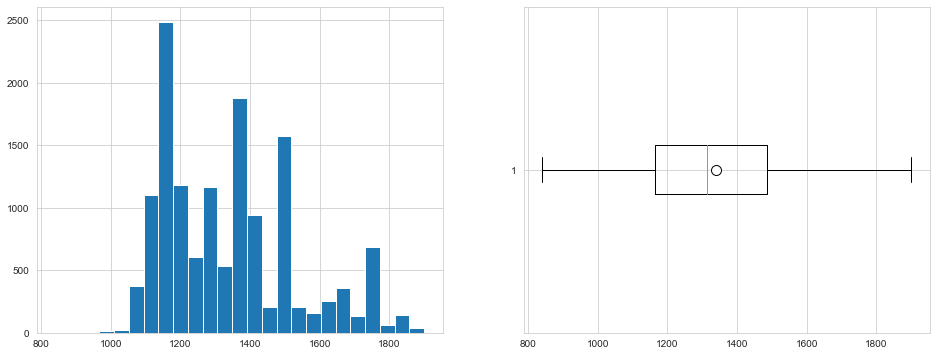

In [110]:
plt.figure(figsize=(16, 6))

plt.subplot(121)
plt.hist(df['Weight_kg'], bins=25)

plt.subplot(122)
plt.boxplot(df['Weight_kg'],
            vert=False,
            whis=2.5,
            showmeans=True,
            meanprops={
                "marker": "o",
                "markerfacecolor": "white",
                "markeredgecolor": "black",
                "markersize": "10"
            })

plt.show()

## - cons_comb

In [111]:
df["cons_comb"].describe()

count   14139.000
mean        4.866
std         1.611
min         0.000
25%         4.100
50%         4.700
75%         5.400
max        55.000
Name: cons_comb, dtype: float64

In [112]:
np.sort(df["cons_comb"].unique())

array([ 0. ,  1. ,  1.2,  1.6,  3. ,  3.1,  3.2,  3.3,  3.4,  3.5,  3.6,
        3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,  4.5,  4.6,  4.7,
        4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,  5.6,  5.7,  5.8,
        5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,  6.7,  6.8,  6.9,
        7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.8,  7.9,  8. ,  8.1,
        8.3,  8.6,  8.7,  9.1, 10. , 11. , 13.8, 32. , 33. , 38. , 40. ,
       43. , 46. , 50. , 51. , 54. , 55. ])

In [113]:
df["cons_comb"].value_counts(dropna=False)

4.000     819
5.400     786
4.700     782
4.400     749
3.900     740
         ... 
33.000      1
50.000      1
1.000       1
46.000      1
11.000      1
Name: cons_comb, Length: 72, dtype: int64

In [114]:
df[(df["cons_comb"] < 3.0) | (13.8 < df["cons_comb"])]

,make_model,body_type,price,km,kW,Type,Previous Owners,Nr. of Doors,Nr. of Seats,Gearing Type,Drive chain,Fuel,CO2 Emission,comfort_convenience,entertainment_media,Extras,safety_security,Gears,Inspection_new,age,Upholstery_type,Displacement_cc,Weight_kg,cons_comb
440,Audi A1,Sedans,13719,31255.000,70.000,Used,1.000,5.000,5.000,Manual,front,Benzine,98.000,"Air conditioning,Armrest,Electrical side mirro...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",5.000,Yes,3.000,Cloth,999.000,1135.000,43.000
2023,Audi A1,Sedans,21390,1800.004,70.000,New,0.000,5.000,5.000,Manual,front,Benzine,116.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Central door lock with r...",5.000,No,0.000,Cloth,999.000,1140.000,51.000
2025,Audi A1,Sedans,21390,1.000,70.000,New,0.000,5.000,5.000,Manual,front,Benzine,116.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Central door lock with r...",5.000,No,0.000,Cloth,999.000,1140.000,51.000
2038,Audi A1,Sedans,21280,1.000,70.000,New,0.000,5.000,5.000,Manual,front,Benzine,116.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Central door lock with r...",5.000,No,0.000,Cloth,999.000,1140.000,51.000
2059,Audi A1,Sedans,20980,1800.004,70.000,New,0.000,5.000,5.000,Manual,front,Benzine,116.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Central door lock with r...",5.000,No,0.000,Cloth,999.000,1140.000,51.000
3257,Audi A3,Sedans,38450,13800.000,110.000,Used,1.000,5.000,5.000,Semi-automatic,front,Electric,103.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Sport package,Sport seats,Voice C...","ABS,Adaptive Cruise Control,Alarm system,Centr...",6.000,No,1.000,Cloth,1395.000,1615.000,1.600
3260,Audi A3,Sedans,35899,20880.000,110.000,Used,1.000,5.000,5.000,Semi-automatic,front,Electric,103.000,"Air conditioning,Power windows,Seat ventilatio...","Bluetooth,Radio",Alloy wheels,"ABS,Adaptive Cruise Control,Alarm system,Centr...",6.000,No,1.000,Cloth,1395.000,1615.000,1.600
3262,Audi A3,Sedans,38000,12000.000,110.000,Used,1.000,5.000,5.000,Semi-automatic,front,Electric,103.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Shift paddles,Sport package,Sport...","ABS,Adaptive Cruise Control,Adaptive headlight...",6.000,No,1.000,Part leather,1395.000,1615.000,1.600
3711,Audi A3,Sedans,19500,23644.000,85.000,Used,1.000,5.000,5.000,Manual,front,Diesel,103.000,"Air conditioning,Automatic climate control,Cru...","Bluetooth,On-board computer",Alloy wheels,"ABS,Central door lock,Power steering,Traction ...",6.000,No,1.000,Cloth,1598.000,1360.000,40.000
3724,Audi A3,Sedans,19500,23644.000,85.000,Used,1.000,5.000,5.000,Manual,front,Diesel,106.000,"Air conditioning,Multi-function steering wheel...","Bluetooth,Radio","Alloy wheels,Sport seats","ABS,Central door lock,Driver-side airbag,Elect...",6.000,No,1.000,Cloth,1598.000,1260.000,40.000


In [115]:
df.loc[(df["cons_comb"] < 3.0) | (13.8 < df["cons_comb"]), "cons_comb"] = np.nan

In [116]:
df["cons_comb"].isnull().sum()

22

In [117]:
for group1 in list(df["make_model"].unique()):
    for group2 in list(df["body_type"].unique()):
        for group3 in list(df["Displacement_cc"].unique()):
            cond1 = df["make_model"] == group1
            cond2 = (df["make_model"] == group1) & (df["body_type"] == group2)
            cond3 = (df["make_model"] == group1) & (
                df["body_type"] == group2) & (df["Displacement_cc"] == group3)
            mode1 = list(df[cond1]["cons_comb"].mode())
            mode2 = list(df[cond2]["cons_comb"].mode())
            mode3 = list(df[cond3]["cons_comb"].mode())
            if mode3 != []:
                df.loc[cond3, "cons_comb"] = df.loc[cond3, "cons_comb"].fillna(
                    df[cond3]["cons_comb"].mode()[0])
            elif mode2 != []:
                df.loc[cond3, "cons_comb"] = df.loc[cond3, "cons_comb"].fillna(
                    df[cond2]["cons_comb"].mode()[0])
            elif mode1 != []:
                df.loc[cond3, "cons_comb"] = df.loc[cond3, "cons_comb"].fillna(
                    df[cond1]["cons_comb"].mode()[0])
            else:
                df.loc[cond3, "cons_comb"] = df.loc[cond3, "cons_comb"].fillna(
                    df["cons_comb"].mode()[0])

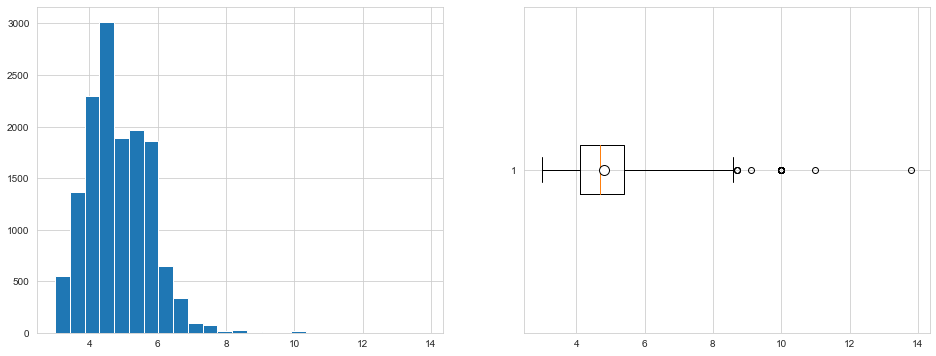

In [118]:
plt.figure(figsize=(16, 6))

plt.subplot(121)
plt.hist(df.cons_comb, bins=25)

plt.subplot(122)
plt.boxplot(df.cons_comb,
            vert=False,
            whis=2.5,
            showmeans=True,
            meanprops={
                "marker": "o",
                "markerfacecolor": "white",
                "markeredgecolor": "black",
                "markersize": "10"
            })

plt.show()

# Categorical Columns

## - make_model

In [119]:
df["make_model"].describe()

count       14139
unique          9
top       Audi A3
freq         2737
Name: make_model, dtype: object

In [120]:
df["make_model"].value_counts(dropna=False)

Audi A3           2737
Opel Insignia     2396
Audi A1           2367
Opel Astra        2294
Opel Corsa        1979
Renault Clio      1469
Renault Espace     878
Renault Duster      18
Audi A2              1
Name: make_model, dtype: int64

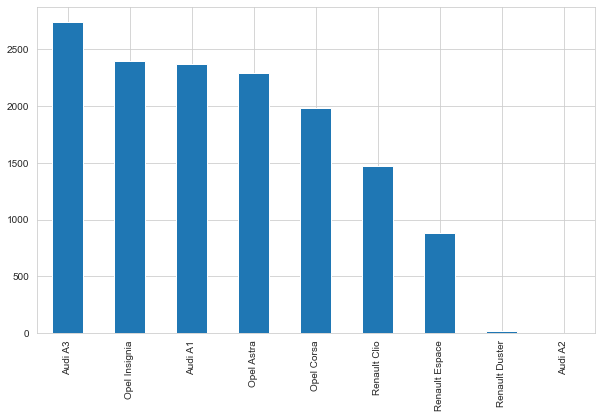

In [121]:
df['make_model'].value_counts().plot(kind='bar');

In [122]:
df[df['make_model'] == "Audi A2"]

,make_model,body_type,price,km,kW,Type,Previous Owners,Nr. of Doors,Nr. of Seats,Gearing Type,Drive chain,Fuel,CO2 Emission,comfort_convenience,entertainment_media,Extras,safety_security,Gears,Inspection_new,age,Upholstery_type,Displacement_cc,Weight_kg,cons_comb
2367,Audi A2,Off-Road,28200,26166.000,85.000,Employee's car,1.000,5.000,5.000,Manual,front,Diesel,108.815,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...",Alloy wheels,"ABS,Adaptive Cruise Control,Central door lock,...",6.000,No,1.000,Cloth,1598.000,1135.000,4.900


In [123]:
df[df["body_type"] == "Off-Road"]

,make_model,body_type,price,km,kW,Type,Previous Owners,Nr. of Doors,Nr. of Seats,Gearing Type,Drive chain,Fuel,CO2 Emission,comfort_convenience,entertainment_media,Extras,safety_security,Gears,Inspection_new,age,Upholstery_type,Displacement_cc,Weight_kg,cons_comb
2367,Audi A2,Off-Road,28200,26166.000,85.000,Employee's car,1.000,5.000,5.000,Manual,front,Diesel,108.815,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...",Alloy wheels,"ABS,Adaptive Cruise Control,Central door lock,...",6.000,No,1.000,Cloth,1598.000,1135.000,4.900
6350,Opel Astra,Off-Road,18590,12607.000,110.000,Used,1.000,5.000,5.000,Automatic,front,Benzine,128.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,MP3,On-board co...","Alloy wheels,Roof rack,Sport seats,Touch scree...","ABS,Adaptive headlights,Central door lock,Dayt...",6.000,No,1.000,Part leather,1399.000,1340.000,5.600
8074,Opel Corsa,Off-Road,7900,35410.000,66.000,Used,1.000,5.000,5.000,Manual,4WD,Benzine,120.000,"Air conditioning,Cruise control,Light sensor,P...",Bluetooth,Alloy wheels,"ABS,Adaptive headlights,Central door lock,Driv...",5.000,No,2.000,Cloth,1400.000,1163.000,5.200
8076,Opel Corsa,Off-Road,7900,37634.000,66.000,Used,1.000,5.000,5.000,Manual,4WD,Benzine,120.000,"Air conditioning,Cruise control,Light sensor,P...",Bluetooth,Alloy wheels,"ABS,Adaptive headlights,Central door lock,Driv...",5.000,No,2.000,Cloth,1400.000,1163.000,5.200
8246,Opel Corsa,Off-Road,8700,79143.000,74.000,Used,1.000,5.000,5.000,Manual,4WD,Benzine,119.000,"Air conditioning,Cruise control,Light sensor,P...",Bluetooth,Alloy wheels,"ABS,Adaptive headlights,Central door lock,Driv...",6.000,No,2.000,Cloth,1400.000,1237.000,5.100
9728,Opel Insignia,Off-Road,12750,159000.000,125.000,Used,1.000,5.000,5.000,Automatic,4WD,Diesel,169.000,"Air conditioning,Air suspension,Armrest,Automa...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Roof rack,Ski bag,Sport package,S...","ABS,Adaptive Cruise Control,Adaptive headlight...",8.000,No,3.000,Full leather,1956.000,1613.000,6.400
11327,Opel Insignia,Off-Road,34776,2409.874,155.000,New,1.000,5.000,5.000,Automatic,4WD,Diesel,135.000,"Air conditioning,Air suspension,Armrest,Automa...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Roof rack,Ski bag,Sport package,S...","ABS,Adaptive Cruise Control,Adaptive headlight...",8.000,No,0.000,Cloth,1956.000,1487.000,6.000
11397,Opel Insignia,Off-Road,32345,1800.004,147.000,New,1.000,5.000,5.000,Automatic,4WD,Benzine,139.000,"Air conditioning,Air suspension,Armrest,Automa...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Roof rack,Ski bag,Sport package,S...","ABS,Adaptive Cruise Control,Adaptive headlight...",6.000,No,0.000,Cloth,1598.000,1487.000,6.000
11413,Opel Insignia,Off-Road,31505,2409.874,125.000,New,1.000,5.000,5.000,Automatic,front,Diesel,135.000,"Air conditioning,Air suspension,Armrest,Automa...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Roof rack,Ski bag,Sport package,S...","ABS,Adaptive Cruise Control,Adaptive headlight...",8.000,No,0.000,Cloth,1956.000,1487.000,6.000
11556,Opel Insignia,Off-Road,33490,8.000,122.000,New,1.000,5.000,5.000,Manual,4WD,Benzine,131.000,"Cruise control,Electrical side mirrors,Navigat...","Bluetooth,Hands-free equipment,On-board computer","Alloy wheels,Roof rack,Sport seats","ABS,Central door lock,Daytime running lights,D...",6.000,No,0.000,Cloth,1490.000,1487.000,5.700


In [124]:
df.shape

(14139, 24)

In [125]:
df.drop(df[df['make_model'] == "Audi A2"].index, axis=0, inplace=True)

In [126]:
df.reset_index(drop = True, inplace = True)

In [127]:
df.shape

(14138, 24)

## - body_type

In [128]:
df["body_type"].describe()

count      14138
unique         8
top       Sedans
freq        7237
Name: body_type, dtype: object

In [129]:
df["body_type"].value_counts(dropna=False)

Sedans           7237
Station wagon    3342
Compact          2671
Van               730
Transporter        86
Off-Road           39
Coupe              25
Convertible         8
Name: body_type, dtype: int64

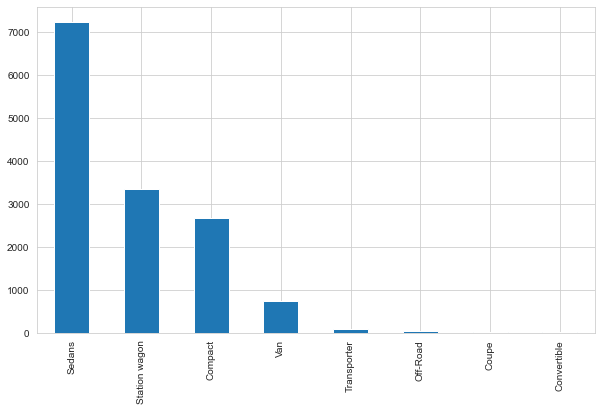

In [130]:
df['body_type'].value_counts().plot(kind='bar');

In [131]:
df[df['body_type'] == "Convertible"]

,make_model,body_type,price,km,kW,Type,Previous Owners,Nr. of Doors,Nr. of Seats,Gearing Type,Drive chain,Fuel,CO2 Emission,comfort_convenience,entertainment_media,Extras,safety_security,Gears,Inspection_new,age,Upholstery_type,Displacement_cc,Weight_kg,cons_comb
2367,Audi A3,Convertible,10893,19800.000,110.000,Used,1.000,2.000,4.000,Automatic,front,Benzine,116.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Shift paddles","ABS,Adaptive Cruise Control,Blind spot monitor...",7.000,No,1.000,Part leather,1498.000,1470.000,5.100
2956,Audi A3,Convertible,20000,37000.000,110.000,Used,1.000,2.000,4.000,Semi-automatic,front,Diesel,124.000,"Air conditioning,Seat ventilation,Split rear s...","Bluetooth,Radio",Alloy wheels,"ABS,Adaptive Cruise Control,Alarm system,Centr...",6.000,No,3.000,Part leather,1968.000,1555.000,4.700
3241,Audi A3,Convertible,56100,8364.000,228.000,Used,1.000,2.000,5.000,Semi-automatic,4WD,Benzine,153.000,"Air conditioning,Armrest,Automatic climate con...","CD player,On-board computer,Radio","Alloy wheels,Shift paddles,Sport seats,Sport s...","ABS,Alarm system,Central door lock,Driver-side...",7.000,No,1.000,Part leather,1984.000,1635.000,7.100
3280,Audi A3,Convertible,29500,26000.000,110.000,Used,1.000,2.000,4.000,Semi-automatic,front,Diesel,117.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport package,Sport seats,Voice C...","Adaptive Cruise Control,Blind spot monitor,Cen...",7.000,No,2.000,Part leather,1968.000,1575.000,4.500
3299,Audi A3,Convertible,32950,8831.000,110.000,Used,1.000,2.000,4.000,Semi-automatic,front,Benzine,114.000,"Air conditioning,Armrest,Automatic climate con...","CD player,MP3,Radio","Alloy wheels,Sport seats,Sport suspension","ABS,Central door lock,Driver-side airbag,Elect...",7.000,No,2.000,Part leather,1395.000,1355.000,4.900
3304,Audi A3,Convertible,30900,468.000,110.000,Employee's car,1.000,2.000,4.000,Semi-automatic,front,Diesel,124.000,"Air conditioning,Cruise control,Navigation sys...","Bluetooth,CD player,Hands-free equipment,MP3,R...","Alloy wheels,Sport seats,Sport suspension","ABS,Central door lock,Isofix,Power steering,Tr...",6.000,No,2.000,Cloth,1968.000,1355.000,4.700
3364,Audi A3,Convertible,22000,9000.000,135.000,Used,1.000,2.000,4.000,Automatic,front,Diesel,134.000,"Air conditioning,Electrical side mirrors,Hill ...","Bluetooth,CD player,MP3,On-board computer,Radio","Alloy wheels,Voice Control","ABS,Central door lock with remote control,Driv...",7.000,No,1.000,Part leather,1968.000,1685.000,5.100
3525,Audi A3,Convertible,20900,54800.000,81.000,Used,1.000,5.000,5.000,Automatic,front,Diesel,99.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Catalytic Converter,Shift paddles","ABS,Central door lock,Central door lock with r...",7.000,No,2.000,Cloth,1598.000,1360.000,3.800


## - Type

In [132]:
df["Type"].describe()

count     14138
unique        5
top        Used
freq      10107
Name: Type, dtype: object

In [133]:
df["Type"].value_counts(dropna=False)

Used              10107
New                1347
Pre-registered     1016
Employee's car      902
Demonstration       766
Name: Type, dtype: int64

In [134]:
df.groupby(["Type", "age"]).km.describe()

count      mean       std       min       25%  \
Type           age                                                      
Demonstration  0.000  611.000  3336.979  3479.266     3.000   500.000   
               1.000  126.000  8652.778  7992.419     8.000  1653.000   
               2.000   27.000 25327.296 17914.687    20.000 15470.500   
               3.000    2.000 45500.000 14849.242 35000.000 40250.000   
Employee's car 0.000  115.000  4646.508  5317.867     1.000   500.000   
               1.000  689.000 19083.291  9254.099     1.000 11200.000   
               2.000   83.000 37248.410 22819.967    59.000 19797.000   
               3.000   15.000 62493.467 28165.626  7790.000 45377.000   
New            0.000 1344.000  1028.040   987.878     0.000    10.000   
               1.000    3.000  6729.268 11562.863     7.000    53.500   
Pre-registered 0.000  872.000   294.837   910.532     1.000    10.000   
               1.000  135.000  4055.809  7557.205     1.000    10.000   
               2.000    8.000  2085.625  4351.343     1.000     7.750   
               3.000    1.000    10.000       NaN    10.000    10.000   
Used           0.000  715.000  4014.325  8903.695     1.000    44.000   
               1.000 3314.000 18847.780 10823.183     1.000 11000.000   
               2.000 2779.000 42705.102 28774.155    15.000 22273.500   
               3.000 3299.000 76680.270 39652.882    35.000 46666.000   

                           50%       75%        max  
Type           age                                   
Demonstration  0.000  2500.000  5000.000  20000.000  
               1.000  5818.500 14370.000  38400.000  
               2.000 18900.000 28238.000  78000.000  
               3.000 45500.000 50750.000  56000.000  
Employee's car 0.000  4000.000  6224.500  37500.000  
               1.000 20500.000 26584.000  80009.000  
               2.000 36584.000 46250.000 112789.000  
               3.000 60892.000 84743.000 103000.000  
New            0.000  1800.004  1800.004   2500.000  
               1.000   100.000 10090.402  20080.804  
Pre-registered 0.000    10.000    50.000   9998.000  
               1.000    50.000  1213.500  20080.804  
               2.000   110.000  1114.750  12300.000  
               3.000    10.000    10.000     10.000  
Used           0.000  1700.000  5500.000 127022.000  
               1.000 18229.500 25100.000 136000.000  
               2.000 35674.000 57000.000 317000.000  
               3.000 72000.000 98708.000 291800.000

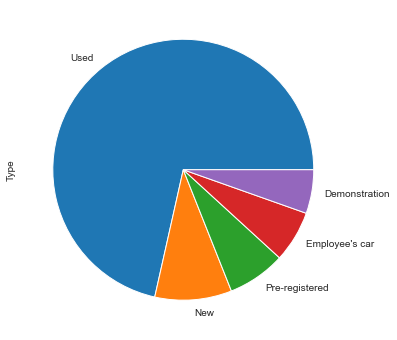

In [135]:
df['Type'].value_counts().plot(kind='pie');

## - Gearing Type

In [136]:
df["Gearing Type"].describe()

count      14138
unique         3
top       Manual
freq        7170
Name: Gearing Type, dtype: object

In [137]:
df["Gearing Type"].value_counts(dropna=False)

Manual            7170
Automatic         6507
Semi-automatic     461
Name: Gearing Type, dtype: int64

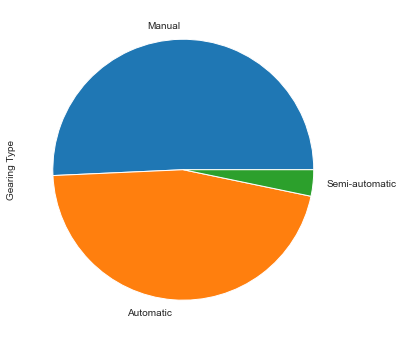

In [138]:
df['Gearing Type'].value_counts().plot(kind='pie');

## - Drive chain

In [139]:
df["Drive chain"].describe()

count     14138
unique        3
top       front
freq      13967
Name: Drive chain, dtype: object

In [140]:
df["Drive chain"].value_counts(dropna=False)

front    13967
4WD        167
rear         4
Name: Drive chain, dtype: int64

In [141]:
df[df["Drive chain"] == "rear"]

,make_model,body_type,price,km,kW,Type,Previous Owners,Nr. of Doors,Nr. of Seats,Gearing Type,Drive chain,Fuel,CO2 Emission,comfort_convenience,entertainment_media,Extras,safety_security,Gears,Inspection_new,age,Upholstery_type,Displacement_cc,Weight_kg,cons_comb
9928,Opel Insignia,Station wagon,12900,76000.000,100.000,Used,1.000,5.000,5.000,Manual,rear,Diesel,109.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Touch screen,Voice Control","ABS,Central door lock,Central door lock with r...",6.000,No,3.000,Cloth,1598.000,1664.000,4.100
10288,Opel Insignia,Sedans,18990,17887.000,125.000,Used,1.000,5.000,5.000,Automatic,rear,Benzine,159.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,On-bo...","Alloy wheels,Sport package,Touch screen,Voice ...","Adaptive headlights,Central door lock,Daytime ...",6.000,No,2.000,Full leather,1598.000,1613.000,6.700
10895,Opel Insignia,Station wagon,18950,24987.000,125.000,Used,1.000,5.000,5.000,Manual,rear,Diesel,135.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,MP3,On-board co...","Alloy wheels,Sport seats","ABS,Central door lock,Daytime running lights,D...",6.000,Yes,1.000,Cloth,1956.000,1487.000,5.800
13062,Renault Clio,Sedans,10490,27700.000,55.000,Used,1.000,5.000,5.000,Manual,rear,Diesel,104.000,"Air conditioning,Cruise control,Navigation sys...","Bluetooth,CD player,Hands-free equipment,Radio...",Touch screen,"ABS,Central door lock,Central door lock with r...",5.000,No,1.000,Cloth,1461.000,1162.000,4.000


## - Fuel

In [142]:
df["Fuel"].describe()

count       14138
unique          4
top       Benzine
freq         7510
Name: Fuel, dtype: object

In [143]:
df["Fuel"].value_counts(dropna=False)

Benzine     7510
Diesel      6564
LPG/CNG       59
Electric       5
Name: Fuel, dtype: int64

In [144]:
df[df["Fuel"] == "Electric"]

,make_model,body_type,price,km,kW,Type,Previous Owners,Nr. of Doors,Nr. of Seats,Gearing Type,Drive chain,Fuel,CO2 Emission,comfort_convenience,entertainment_media,Extras,safety_security,Gears,Inspection_new,age,Upholstery_type,Displacement_cc,Weight_kg,cons_comb
3006,Audi A3,Compact,24950,57000.000,150.000,Used,1.000,5.000,5.000,Semi-automatic,front,Electric,105.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Roof rack,Sport package,Sport sea...","ABS,Adaptive Cruise Control,Adaptive headlight...",6.000,No,3.000,Part leather,1400.000,1285.000,4.000
3256,Audi A3,Sedans,38450,13800.000,110.000,Used,1.000,5.000,5.000,Semi-automatic,front,Electric,103.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Sport package,Sport seats,Voice C...","ABS,Adaptive Cruise Control,Alarm system,Centr...",6.000,No,1.000,Cloth,1395.000,1615.000,4.700
3259,Audi A3,Sedans,35899,20880.000,110.000,Used,1.000,5.000,5.000,Semi-automatic,front,Electric,103.000,"Air conditioning,Power windows,Seat ventilatio...","Bluetooth,Radio",Alloy wheels,"ABS,Adaptive Cruise Control,Alarm system,Centr...",6.000,No,1.000,Cloth,1395.000,1615.000,4.700
3261,Audi A3,Sedans,38000,12000.000,110.000,Used,1.000,5.000,5.000,Semi-automatic,front,Electric,103.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Shift paddles,Sport package,Sport...","ABS,Adaptive Cruise Control,Adaptive headlight...",6.000,No,1.000,Part leather,1395.000,1615.000,4.700
12046,Renault Clio,Sedans,8490,23863.000,55.000,Used,1.000,5.000,5.000,Automatic,front,Electric,118.000,"Air conditioning,Cruise control,Navigation system",On-board computer,Alloy wheels,Driver-side airbag,6.000,No,3.000,Cloth,1461.000,1165.000,3.300


In [145]:
df[(df["Fuel"] == "Electric") & (df["make_model"] == "Renault Clio")]

,make_model,body_type,price,km,kW,Type,Previous Owners,Nr. of Doors,Nr. of Seats,Gearing Type,Drive chain,Fuel,CO2 Emission,comfort_convenience,entertainment_media,Extras,safety_security,Gears,Inspection_new,age,Upholstery_type,Displacement_cc,Weight_kg,cons_comb
12046,Renault Clio,Sedans,8490,23863.000,55.000,Used,1.000,5.000,5.000,Automatic,front,Electric,118.000,"Air conditioning,Cruise control,Navigation system",On-board computer,Alloy wheels,Driver-side airbag,6.000,No,3.000,Cloth,1461.000,1165.000,3.300


In [146]:
df.shape

(14138, 24)

In [147]:
df.drop(df[(df["Fuel"] == "Electric") & (df["make_model"] == "Renault Clio")].index, axis=0, inplace=True)

In [148]:
df.reset_index(drop = True, inplace = True)

In [149]:
df.shape

(14137, 24)

## - comfort_convenience

In [150]:
df["comfort_convenience"].describe()

count                                                 14137
unique                                                 6196
top       Air conditioning,Electrical side mirrors,Hill ...
freq                                                    308
Name: comfort_convenience, dtype: object

In [151]:
df["comfort_convenience"]

0        Air conditioning,Armrest,Automatic climate con...
1        Air conditioning,Automatic climate control,Hil...
2        Air conditioning,Cruise control,Electrical sid...
3        Air suspension,Armrest,Auxiliary heating,Elect...
4        Air conditioning,Armrest,Automatic climate con...
                               ...                        
14132    Air conditioning,Armrest,Automatic climate con...
14133    Air conditioning,Automatic climate control,Cru...
14134    Air conditioning,Armrest,Automatic climate con...
14135    Air conditioning,Automatic climate control,Cru...
14136    Air conditioning,Armrest,Automatic climate con...
Name: comfort_convenience, Length: 14137, dtype: object

## - entertainment_media

In [152]:
df["entertainment_media"].describe()

count                                                 14137
unique                                                  346
top       Bluetooth,Hands-free equipment,On-board comput...
freq                                                   1541
Name: entertainment_media, dtype: object

In [153]:
df["entertainment_media"]

0        Bluetooth,Hands-free equipment,On-board comput...
1        Bluetooth,Hands-free equipment,On-board comput...
2                                    MP3,On-board computer
3        Bluetooth,CD player,Hands-free equipment,MP3,O...
4        Bluetooth,CD player,Hands-free equipment,MP3,O...
                               ...                        
14132    Bluetooth,Digital radio,Hands-free equipment,O...
14133    Bluetooth,Digital radio,Hands-free equipment,O...
14134    Bluetooth,Digital radio,Hands-free equipment,M...
14135    Bluetooth,Digital radio,Hands-free equipment,R...
14136    Bluetooth,Hands-free equipment,On-board comput...
Name: entertainment_media, Length: 14137, dtype: object

## - Extras

In [154]:
df["Extras"].describe()

count            14137
unique             659
top       Alloy wheels
freq              4985
Name: Extras, dtype: object

In [155]:
df["Extras"]

0           Alloy wheels,Catalytic Converter,Voice Control
1        Alloy wheels,Sport seats,Sport suspension,Voic...
2                               Alloy wheels,Voice Control
3                   Alloy wheels,Sport seats,Voice Control
4        Alloy wheels,Sport package,Sport suspension,Vo...
                               ...                        
14132              Alloy wheels,Touch screen,Voice Control
14133                            Alloy wheels,Touch screen
14134    Alloy wheels,Catalytic Converter,Sport suspens...
14135              Alloy wheels,Touch screen,Voice Control
14136                                         Alloy wheels
Name: Extras, Length: 14137, dtype: object

## - safety_security

In [156]:
df["safety_security"].describe()

count                                                 14137
unique                                                 4442
top       ABS,Central door lock,Daytime running lights,D...
freq                                                    613
Name: safety_security, dtype: object

In [157]:
df["safety_security"]

0        ABS,Central door lock,Daytime running lights,D...
1        ABS,Central door lock,Central door lock with r...
2        ABS,Central door lock,Daytime running lights,D...
3        ABS,Alarm system,Central door lock with remote...
4        ABS,Central door lock,Driver-side airbag,Elect...
                               ...                        
14132    ABS,Adaptive Cruise Control,Central door lock,...
14133    ABS,Central door lock,Central door lock with r...
14134    ABS,Adaptive Cruise Control,Blind spot monitor...
14135    ABS,Adaptive Cruise Control,Blind spot monitor...
14136    ABS,Adaptive Cruise Control,Blind spot monitor...
Name: safety_security, Length: 14137, dtype: object

## - Inspection_new

In [158]:
df["Inspection_new"].describe()

count     14137
unique        2
top          No
freq      10500
Name: Inspection_new, dtype: object

In [159]:
df["Inspection_new"].value_counts(dropna=False)

No     10500
Yes     3637
Name: Inspection_new, dtype: int64

## - Upholstery_type

In [160]:
df["Upholstery_type"].describe()

count     14137
unique        5
top       Cloth
freq      11384
Name: Upholstery_type, dtype: object

In [161]:
df["Upholstery_type"].value_counts(dropna=False)

Cloth           11384
Part leather     1353
Full leather     1288
alcantara          56
Velour             56
Name: Upholstery_type, dtype: int64

# Final Step (Checking final situation of data via graphs)

In [162]:
df.shape

(14137, 24)

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14137 entries, 0 to 14136
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           14137 non-null  object 
 1   body_type            14137 non-null  object 
 2   price                14137 non-null  int64  
 3   km                   14137 non-null  float64
 4   kW                   14137 non-null  float64
 5   Type                 14137 non-null  object 
 6   Previous Owners      14137 non-null  float64
 7   Nr. of Doors         14137 non-null  float64
 8   Nr. of Seats         14137 non-null  float64
 9   Gearing Type         14137 non-null  object 
 10  Drive chain          14137 non-null  object 
 11  Fuel                 14137 non-null  object 
 12  CO2 Emission         14137 non-null  float64
 13  comfort_convenience  14137 non-null  object 
 14  entertainment_media  14137 non-null  object 
 15  Extras               14137 non-null 

In [164]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,14137.000,18109.087,7421.986,4950.000,12960.000,16950.000,21900.000,74600.000
km,14137.000,32594.791,36838.517,0.000,3916.000,21000.000,46928.000,317000.000
kW,14137.000,88.729,26.564,40.000,66.000,85.000,103.000,294.000
Previous Owners,14137.000,1.041,0.338,0.000,1.000,1.000,1.000,4.000
Nr. of Doors,14137.000,4.659,0.642,2.000,4.000,5.000,5.000,5.000
Nr. of Seats,14137.000,4.949,0.466,2.000,5.000,5.000,5.000,7.000
CO2 Emission,14137.000,117.769,17.822,80.000,104.000,118.000,128.000,253.000
Gears,14137.000,5.940,0.703,5.000,5.000,6.000,6.000,8.000
age,14137.000,1.415,1.109,0.000,0.000,1.000,2.000,3.000
Displacement_cc,14137.000,1432.737,278.274,890.000,1229.000,1461.000,1598.000,2480.000


In [165]:
df.describe(include="O").T

,count,unique,top,freq
make_model,14137,8,Audi A3,2737
body_type,14137,8,Sedans,7236
Type,14137,5,Used,10106
Gearing Type,14137,3,Manual,7170
Drive chain,14137,3,front,13966
Fuel,14137,4,Benzine,7510
comfort_convenience,14137,6196,"Air conditioning,Electrical side mirrors,Hill ...",308
entertainment_media,14137,346,"Bluetooth,Hands-free equipment,On-board comput...",1541
Extras,14137,659,Alloy wheels,4985
safety_security,14137,4442,"ABS,Central door lock,Daytime running lights,D...",613


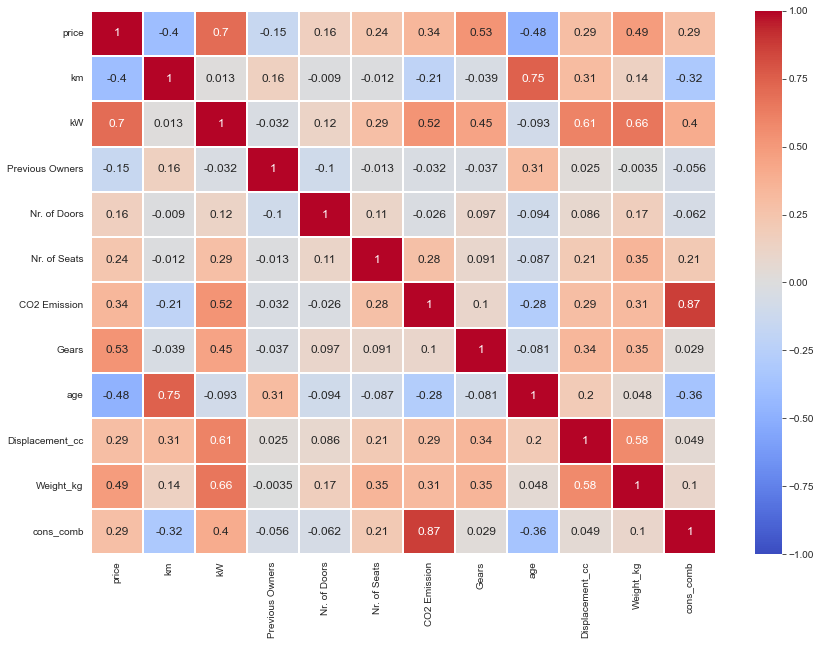

In [166]:
plt.figure(figsize=(14, 10))

sns.heatmap(df.corr(),
            annot=True,
            center=0,
            vmin=-1,
            cmap="coolwarm",
            linewidths=0.2,
            annot_kws={"size": 12});

We will delete these columns after we determined that the following columns did not have enough effect on the price according to the heatmap chart.

In [167]:
df.drop(columns=["Previous Owners", "Nr. of Doors", "Nr. of Seats"], axis = 0, inplace = True)

In [168]:
# Correlated columns with "price"
"km", "kW", "Gears", "age", "Weight_kg"

('km', 'kW', 'Gears', 'age', 'Weight_kg')

In [169]:
df.head(3).T

,0,1,2
make_model,Audi A1,Audi A1,Audi A1
body_type,Sedans,Sedans,Sedans
price,15770,14500,14640
km,56013.000,80000.000,83450.000
kW,66.000,141.000,85.000
Type,Used,Used,Used
Gearing Type,Automatic,Automatic,Automatic
Drive chain,front,front,front
Fuel,Diesel,Benzine,Diesel
CO2 Emission,99.000,129.000,99.000


In [170]:
df.tail(3).T

,14134,14135,14136
make_model,Renault Espace,Renault Espace,Renault Espace
body_type,Van,Van,Van
price,39950,39885,39875
km,1000.000,9900.000,15.000
kW,165.000,165.000,146.000
Type,Demonstration,Used,Pre-registered
Gearing Type,Automatic,Automatic,Automatic
Drive chain,front,front,front
Fuel,Benzine,Benzine,Diesel
CO2 Emission,153.000,168.000,139.000


In [171]:
df.groupby(["Gears", "age"]).price.describe()

count      mean      std       min       25%       50%  \
Gears age                                                               
5.000 0.000  850.000 14534.736 4548.946  6900.000 10900.000 11390.000   
      1.000 1123.000 12805.358 3283.823  7499.000  9880.000 11748.000   
      2.000  823.000 11009.657 3081.103  6000.000  8584.500  9450.000   
      3.000  950.000 10014.964 2886.688  4950.000  7512.500  8490.000   
6.000 0.000 1957.000 25234.719 8341.521  6950.000 18450.000 23880.000   
      1.000 2327.000 19557.599 5135.933  5555.000 15480.000 19300.000   
      2.000 1592.000 16619.355 4461.073  7800.000 12900.000 16900.000   
      3.000 1815.000 14520.237 4257.511  6000.000 11150.000 14400.000   
7.000 0.000  730.000 27595.059 5853.463 15500.000 24935.000 26500.000   
      1.000  754.000 23223.556 5862.953 10893.000 20785.000 22295.000   
      2.000  469.000 20895.812 4610.622 12500.000 18890.000 20500.000   
      3.000  549.000 17356.087 2760.891 10400.000 15900.000 16990.000   
8.000 0.000  120.000 35381.133 4050.086 14770.000 33574.500 36173.000   
      1.000   63.000 23334.651 1011.485 19480.000 22890.000 23490.000   
      2.000   13.000 20029.692 1454.837 16880.000 19450.000 20500.000   
      3.000    2.000 15575.000 3995.153 12750.000 14162.500 15575.000   

                  75%       max  
Gears age                        
5.000 0.000 18490.000 27980.000  
      1.000 16117.500 27850.000  
      2.000 14500.000 19950.000  
      3.000 12988.000 18497.000  
6.000 0.000 29990.000 64332.000  
      1.000 21500.000 39990.000  
      2.000 18890.000 35000.000  
      3.000 15950.000 35000.000  
7.000 0.000 27967.500 68320.000  
      1.000 23200.000 74600.000  
      2.000 21500.000 67600.000  
      3.000 18000.000 42500.000  
8.000 0.000 37878.750 40990.000  
      1.000 23987.000 24590.000  
      2.000 21000.000 21631.000  
      3.000 16987.500 18400.000

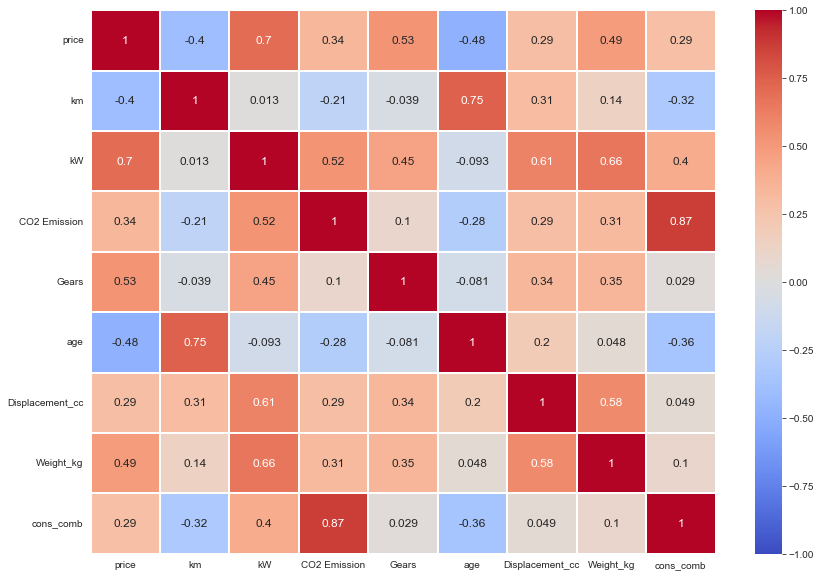

In [172]:
plt.figure(figsize=(14, 10))

sns.heatmap(df.corr(),
            annot=True,
            center=0,
            vmin=-1,
            cmap="coolwarm",
            linewidths=0.2,
            annot_kws={"size": 12});

## Export dataframe to csv file (without dummy)

In [173]:
df.to_csv('auto_scout_not_dummy.csv', index=False)

# Dummy Operation

In [174]:
df = df.join(df["comfort_convenience"].str.get_dummies(sep = ",").add_prefix("cc_"), lsuffix='_')
df = df.join(df["entertainment_media"].str.get_dummies(sep = ",").add_prefix("em_"), lsuffix='_')
df = df.join(df["Extras"].str.get_dummies(sep = ",").add_prefix("ex_"), lsuffix='_')
df = df.join(df["safety_security"].str.get_dummies(sep = ",").add_prefix("ss_"), lsuffix='_')

In [175]:
df.drop(["comfort_convenience","entertainment_media","Extras","safety_security"], axis=1, inplace=True)

In [176]:
df.shape

(14137, 111)

In [177]:
df_final = pd.get_dummies(df, drop_first=True)

In [178]:
df_final.shape

(14137, 133)

In [179]:
df_final.head()

,price,km,kW,CO2 Emission,Gears,age,Displacement_cc,Weight_kg,cons_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Gearing Type_Manual,Gearing Type_Semi-automatic,Drive chain_front,Drive chain_rear,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Inspection_new_Yes,Upholstery_type_Full leather,Upholstery_type_Part leather,Upholstery_type_Velour,Upholstery_type_alcantara
0,15770,56013.000,66.000,99.000,7.000,3.000,1422.000,1220.000,3.800,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0
1,14500,80000.000,141.000,129.000,7.000,2.000,1798.000,1255.000,5.600,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
2,14640,83450.000,85.000,99.000,7.000,3.000,1598.000,1135.000,3.800,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0
3,14500,73000.000,66.000,99.000,6.000,3.000,1422.000,1195.000,3.800,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,0,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0
4,16790,16200.000,66.000,109.000,7.000,3.000,1422.000,1135.000,4.100,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,

## Export dataframe to csv file (dummy)

In [180]:
df_final.to_csv("final_scout_dummy.csv", index=False)

------------------------------------
END OF THE PART - 2 : HANDLING WITH MISSING VALUES